# Data Signal Processing

In [1]:
import numpy as np
import pylab as pl
import scipy as sp
import scipy.signal as signal
import scipy.io.wavfile as wf
import matplotlib.pyplot as plt
import time

   ## 1 - Signal generation and sampling

### 1.1 - Signal generation

In [333]:
f0 = 2
f1 = 3*f0

def x(t) :
    m = len(t)
    res = np.sin(2*np.pi*f0*t) + np.cos(2*np.pi*f1*t)    
    return res

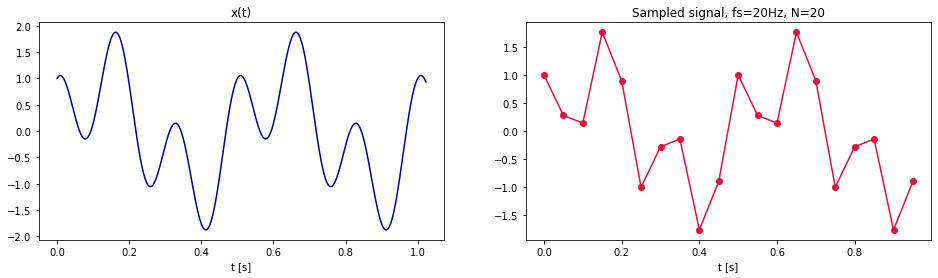

In [334]:
#Finely sampled signal
N0 = 1024
fs0 = 1000
t0 = np.arange(0, N0/fs0, 1/fs0)
x0 = x(t0)

#Sampled signal
N = 20
fs = 20
tn = np.arange(0, N/fs, 1/fs)
xn = x(tn)


plt.figure(figsize=[16,4])
plt.subplot(1,2,1)
plt.title('x(t)')
plt.xlabel('t [s]')
plt.plot(t0, x0, 'darkblue')
plt.subplot(1,2,2)
plt.title('Sampled signal, fs=20Hz, N=20')
plt.xlabel('t [s]')
plt.plot(tn, xn, '-o', c='crimson')
plt.show()

### 1.2 - Signal reconstruction

To ensure that the signal $x(t)$ can be reconstructed, the support of the Fourier transform $X(f)$ must be in $[-\frac{f_{s}}{2}, \frac{f_{s}}{2}]$. The support of $X(f)$ being $\{f_0, f_1\}$ , we must have  $\frac{f_{s}}{2} \geq max(f_0,f_1)$ , which means here that $f_s \geq 12Hz$ .

In [331]:
def rec_sin(xs, ts, fs, t) :
    N = len(ts)
    x = 0
    
    for i in range(N) :
        x += np.sinc(fs*t-i)*xs[i]
        
    return x

In [ ]:
f0 = 2
f1 = 2*f0

#This signal
def x2(t) :
    m = len(t)
    res = np.sin(2*np.pi*f0*t) + np.cos(2*np.pi*f1*t)    
    return res

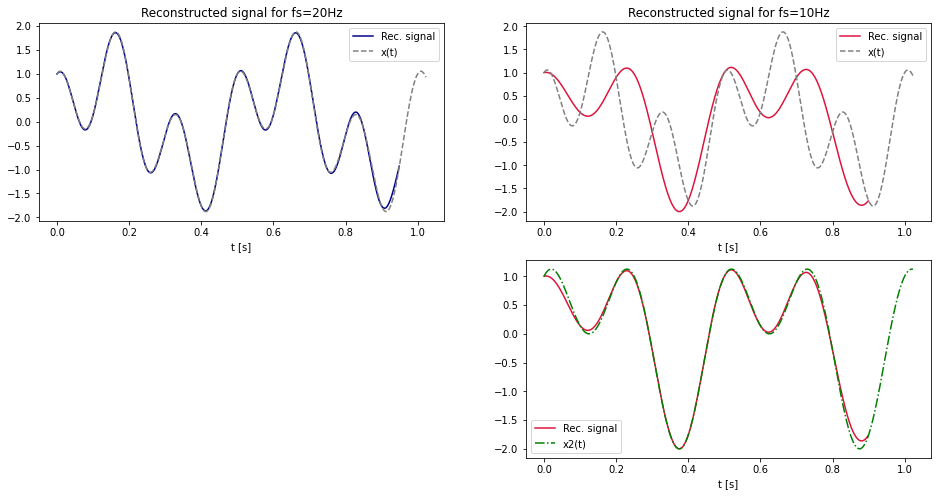

In [347]:
absc = np.arange(0,1,1/1000)


#Signal reconstructed for fs=20Hz
y = np.zeros(950)
for i in range(950) :
    y[i] = rec_sin(xn, tn, fs, absc[i])

    
#Signal sampled with fs=10Hz
Nbis = 10
fsbis = 10
tnbis = np.arange(0, Nbis/fsbis, 1/fsbis)
xnbis = x(tnbis)

#Signal reconstructed for fs=10Hz
ybis = np.zeros(900)
for i in range(900) :
    ybis[i] = rec_sin(xnbis, tnbis, fsbis, absc[i])
    
    
    

plt.figure(figsize=[16,8])
plt.subplot(2,2,1)
plt.title('Reconstructed signal for fs=20Hz')
plt.plot(absc[:950], y, 'darkblue', label='Rec. signal')
plt.plot(t0, x0, '--', c='grey', label="x(t)")
plt.legend()
plt.xlabel('t [s]')
plt.subplot(2,2,2)
plt.title('Reconstructed signal for fs=10Hz')
plt.plot(absc[:900], ybis, 'crimson', label="Rec. signal")
plt.plot(t0, x0, '--', c='grey', label='x(t)')
plt.legend()
plt.xlabel('t [s]')
plt.subplot(2,2,4)
plt.plot(absc[:900], ybis, 'crimson', label="Rec. signal")
plt.plot(t0, x2(t0), '-.', c='green', label='x2(t)')
plt.legend()
plt.xlabel('t [s]')
plt.show()

As expected, when $f_s \leq 12Hz$ the signal is incorrectly reconstructed. The signal reconstructed for $f_s = 10Hz$ is closer to $sin(2\pi f_0 t) + cos(2\pi f'_1 t)$ where $f'_1 = 4Hz$. In aspect it looks as if $f_1$ had been decreased by the reconstruction with a $f_s$ too small.
However, when $f_s = 20Hz$, the sampling frequency is big enough and the signal is correctly reconstructed, the only little difference with the original signal is when we get close to $1$ which is a bounder of the selected interval. The fact that the reconstruction process here considers that the sampled signal is equal to 0 outside of $[0,1]$, which is obviously untrue, explains this difference.

### 1.3 - Audio signal generation

In [111]:
t = np.linspace(0., 1., 8000)
data = 0.5*np.sin(2*np.pi*425*t)
wf.write("dialtone.wav", 8000, data)

In [118]:
def get_note(m,fs,l) :
    t = np.linspace(0., l, fs)
    f0 = 440*pow(2, (m-69)/12)
    return 0.5*np.sin(2*np.pi*f0*t)

We can notice that an increase of $1$ in the MIDI number corresponds to an increase of a half tone on the musical range. Since there are 12 half tones in an octave, we can notice that doubling the frequence of a note is equivalent to pitching it an octave higher, which is coherent with the fact that we hear the same note.

In [278]:
wf.write("A4.wav", 8000, get_note(69, 8000, 1))

In [279]:
wf.write("A8.wav", 8000, get_note(117, 8000, 1))

The frequency of A8 is $440*2^{\frac{117-69}{12}} = 7040Hz \geq \frac{fs}{2}$ . The signal is then incorrectly reconstructed, this is the reason why it sounds saturated and has noise. 

In [277]:
a1 = get_note(70,8000,1)
a2 = get_note(72,8000,1)
a3 = get_note(68,8000,1)
a4 = get_note(56,8000,1)
a5 = get_note(63,8000,1)
data = np.concatenate((a1, a2, a3, a4, a5))

wf.write("seq.wav", 8000, data)

This audio file comes from the movie "Close encounters of a third kind" by Steven Spielberg.

In [275]:
data = np.clip(get_note(69,8000,1), -0.05, 0.05)

wf.write("A4clip.wav", 8000, data)

The saturation adds harmonies to the spectrum in frequency. It is coherent with the fact that the more a sinus function is clipped, the more it looks like a rectangular function, which has an infinity of harmonies.

In [11]:
t = np.linspace(0., 1., 8000)
data = np.sin(2*np.pi*(100*t + 250*t*t))
wf.write("chirp.wav", 8000, data)

This signal is modulated linearly in frequence ($\phi(t)/t = 250t$ is linear). We can indeed hear that the pitch of the sound is gradually increasing.

## 2 - Discrete Fourier Transform (DFT) and Fast Fourier Transform (FFT)

### 2.1 - Basis functions and Discrete Fourier Transform Matrix

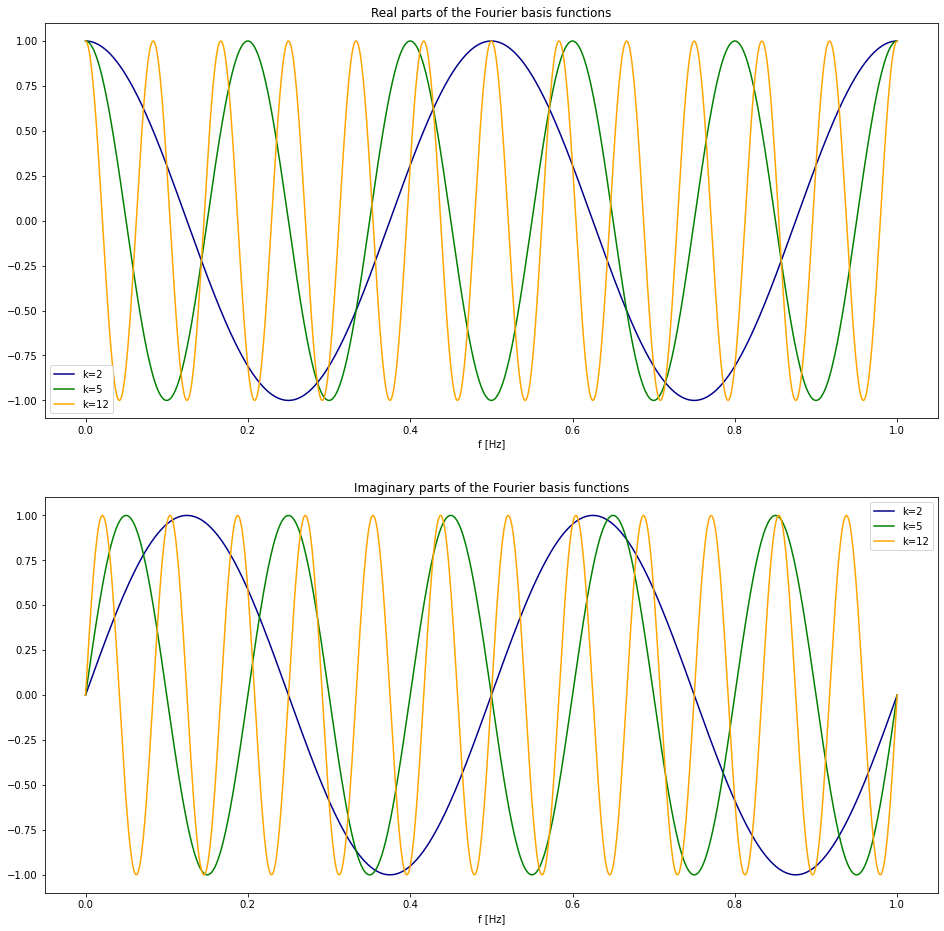

In [29]:
N = 32
f = np.linspace(0., 1., 1000)

def basfunc(k, f) :
    return np.exp(2*np.pi*1j*k*f)

y1 = np.zeros(1000, dtype='complex')
y2 = np.zeros(1000, dtype='complex')
y3 = np.zeros(1000, dtype='complex')

for i in range(1000) :
    y1[i] = basfunc(2, f[i])
    y2[i] = basfunc(5, f[i])
    y3[i] = basfunc(12, f[i])
    
    
plt.figure(figsize=[16,16])
plt.subplot(2,1,1)
plt.title('Real parts of the Fourier basis functions')
plt.plot(f, np.real(y1), 'darkblue', label='k=2')
plt.plot(f, np.real(y2), 'green', label='k=5')
plt.plot(f, np.real(y3), 'orange', label='k=12')
plt.legend()
plt.xlabel('f [Hz]')
plt.subplot(2,1,2)
plt.title('Imaginary parts of the Fourier basis functions')
plt.plot(f, np.imag(y1), 'darkblue', label='k=2')
plt.plot(f, np.imag(y2), 'green', label='k=5')
plt.plot(f, np.imag(y3), 'orange', label='k=12')
plt.legend()
plt.xlabel('f [Hz]')
plt.show()

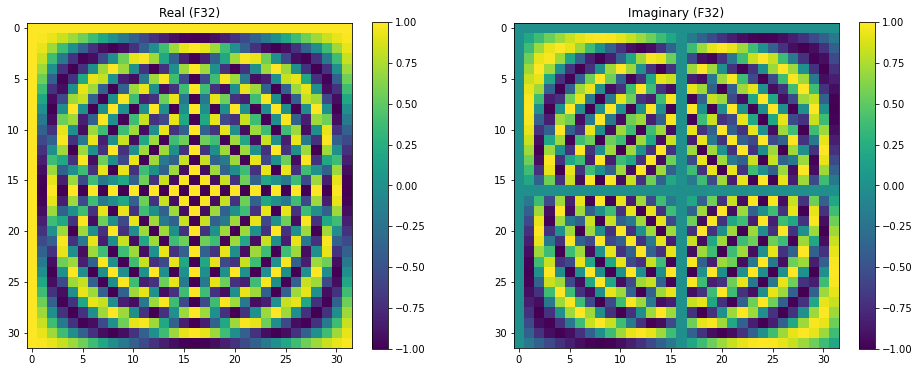

In [164]:
F32 = np.ones((N,N), dtype='complex')

for i in range(N) :
    for j in range(N) :
        F32[i, j] = basfunc(i, j/N)

plt.figure(figsize=[16,8])
plt.subplot(1,2,1)
plt.title('Real (F32)')
plt.imshow(np.real(F32))
plt.colorbar(shrink=0.75)
plt.subplot(1,2,2)
plt.title('Imaginary (F32)')
plt.imshow(np.imag(F32))
plt.colorbar(shrink=0.75)

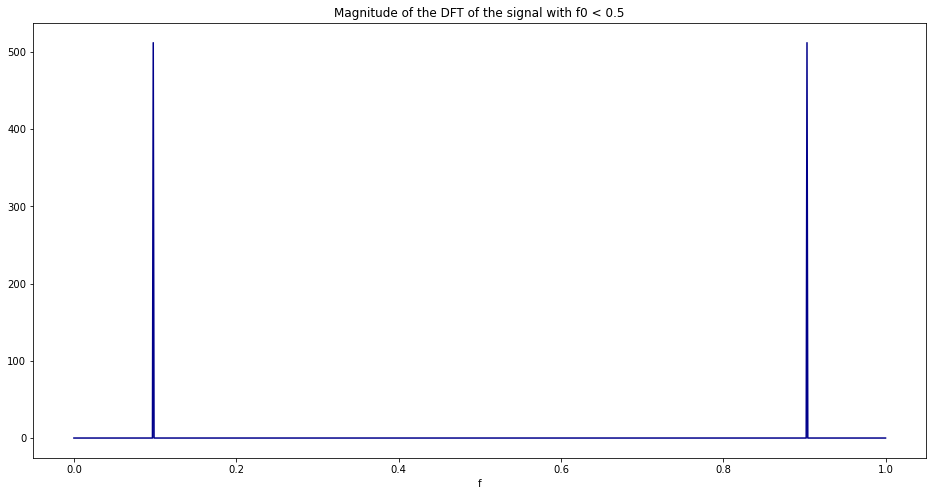

In [30]:
N = 1024
f0 = 100/N

#Signal
xn = np.cos(2*np.pi*f0*np.arange(N))

#FT matrix
F1024 = np.ones((N,N), dtype='complex')
for i in range(N) :
    for j in range(N) :
        F1024[i, j] = basfunc(i, j/N)
        
#Fourier Transform
xdft = np.dot(F1024, xn)
f = np.linspace(0., 1., 1024)

plt.figure(figsize=[16,8])
plt.title('Magnitude of the DFT of the signal with f0 < 0.5')
plt.plot(f, np.abs(xdft), 'darkblue')
plt.xlabel('f')
plt.show()

The dirac on the left side corresponds to the frequency $f_0$ of the analogic function. The dirac on the right corresponds to the frequency $f_s - f_0$, and is part of the first repetition of the "analogic spectrum".

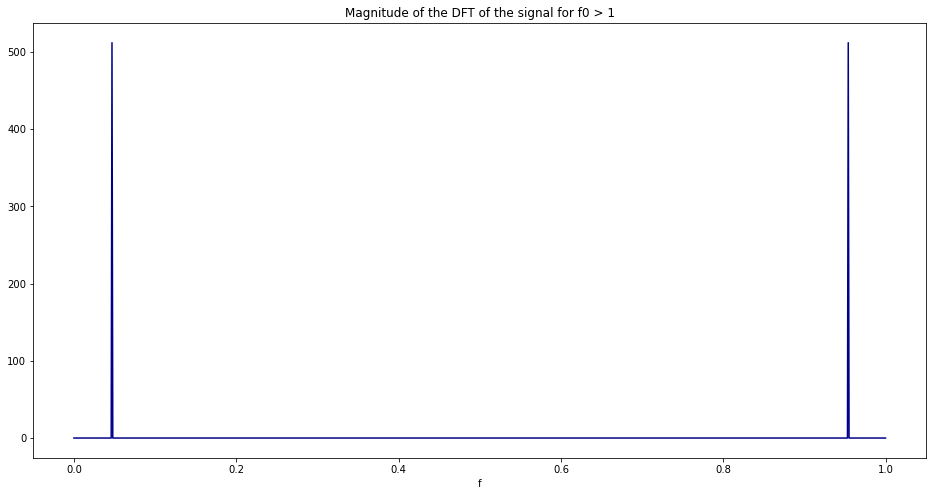

In [39]:
f0 = 2000/N

#Signal
xn = np.cos(2*np.pi*f0*np.arange(N))

#Fourier Transform
xdft = np.dot(F1024, xn)
f = np.linspace(0., 1., 1024)

plt.figure(figsize=[16,8])
plt.title('Magnitude of the DFT of the signal for f0 > 1')
plt.plot(f, np.abs(xdft), 'darkblue')
plt.xlabel('f')
plt.show()

When $f_0 \gt N$ , the dirac on the left corresponds to a part of the $k^{th}$ repetition on the left of the "analogic spectrum", while the dirac on the right corresponds to a part of the $(k+1)^{th}$ repetition on the right.

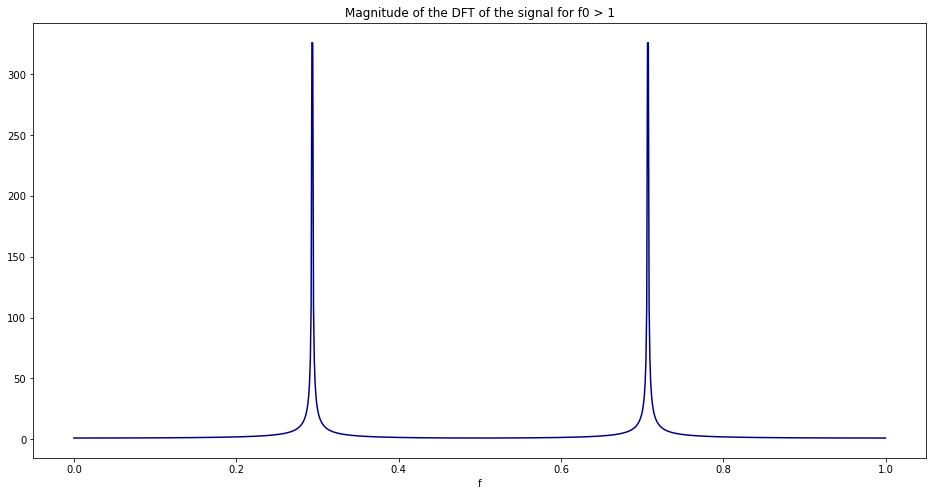

In [250]:
f0 = 300.5/N

#Signal
xn = np.cos(2*np.pi*f0*np.arange(N))
        
#Fourier Transform
xdft = np.dot(F1024, xn)
f = np.linspace(0., 1., 1024)

plt.figure(figsize=[16,8])
plt.title('Magnitude of the DFT of the signal for f0 > 1')
plt.plot(f, np.abs(xdft), 'darkblue')
plt.xlabel('f')
plt.show()

When $f_0$ is not an integer, the spectrum isn't perfectly discrete anymore but the diracs extends at their base.

### 2.2 - Fast Fourier Transform

In [217]:
N = 1024
f0 = 500/N

xn = np.cos(2*np.pi*f0*np.arange(N))   

a = time.process_time()
#Fourier Matrix
F1024 = np.ones((N,N), dtype='complex')
for i in range(N) :
    for j in range(N) :
        F1024[i, j] = basfunc(i, j/N)
b = time.process_time()
#Computation with the Fourier Matrix
np.dot(F1024, xn)
c = time.process_time()
#Computation with the FFT
np.fft.fft(xn)
d = time.process_time()

print("Computng the DFT without the Fourier Matrix precomputed took", c-a, "s.")
print("Computng the DFT with the Fourier Matrix precomputed took", c-b, "s.")
print("Computng the FFT took", d-c, "s.")

Computng the DFT without the Fourier Matrix precomputed took 2.1252747810000017 s.
Computng the DFT with the Fourier Matrix precomputed took 0.0022950850000000855 s.
Computng the FFT took 0.00026159899999811387 s.


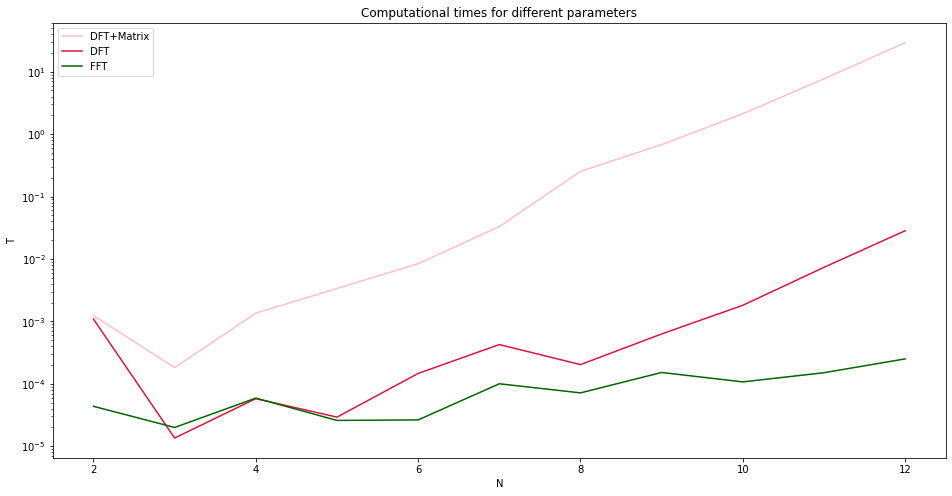

In [350]:
y1 = np.zeros(11)
y2 = np.zeros(11)
y3 = np.zeros(11)

for k in range(2,13) :
    N = pow(2,k)
    f0 = 500/N

    xn = np.cos(2*np.pi*f0*np.arange(N))   

    a = time.process_time()
    #Fourier Matrix
    F = np.ones((N,N), dtype='complex')
    for i in range(N) :
        for j in range(N) :
            F[i, j] = basfunc(i, j/N)
    b = time.process_time()
    #Computation with the Fourier Matrix
    np.dot(F, xn)
    c = time.process_time()
    #Computation with the FFT
    np.fft.fft(xn)
    d = time.process_time()
    
    y1[k-2] = c-a
    y2[k-2] = c-b
    y3[k-2] = d-c
    

plt.figure(figsize=[16,8])
plt.title('Computational times for different parameters')
plt.xlabel('N')
plt.ylabel('T')
plt.semilogy(range(2,13), y1, c='pink', label='DFT+Matrix')
plt.semilogy(range(2,13), y2, c='crimson', label='DFT')
plt.semilogy(range(2,13), y3, c='darkgreen', label='FFT')
plt.legend()
plt.show()

The computational time of DFT+Matrix is longer than that of DFT, but they both seem to increase at the same rate. This is due to the fact that both the computation of the Fourier Matrix and the multiplication of the signal by this Matrix need a quadratic complexity in time.On the other hand, the computation FFT which has a complexity in $O(Nlog(N))$, which is much faster for a higher $N$ and increases slowlier.

### 2.3 - Interpreting signals

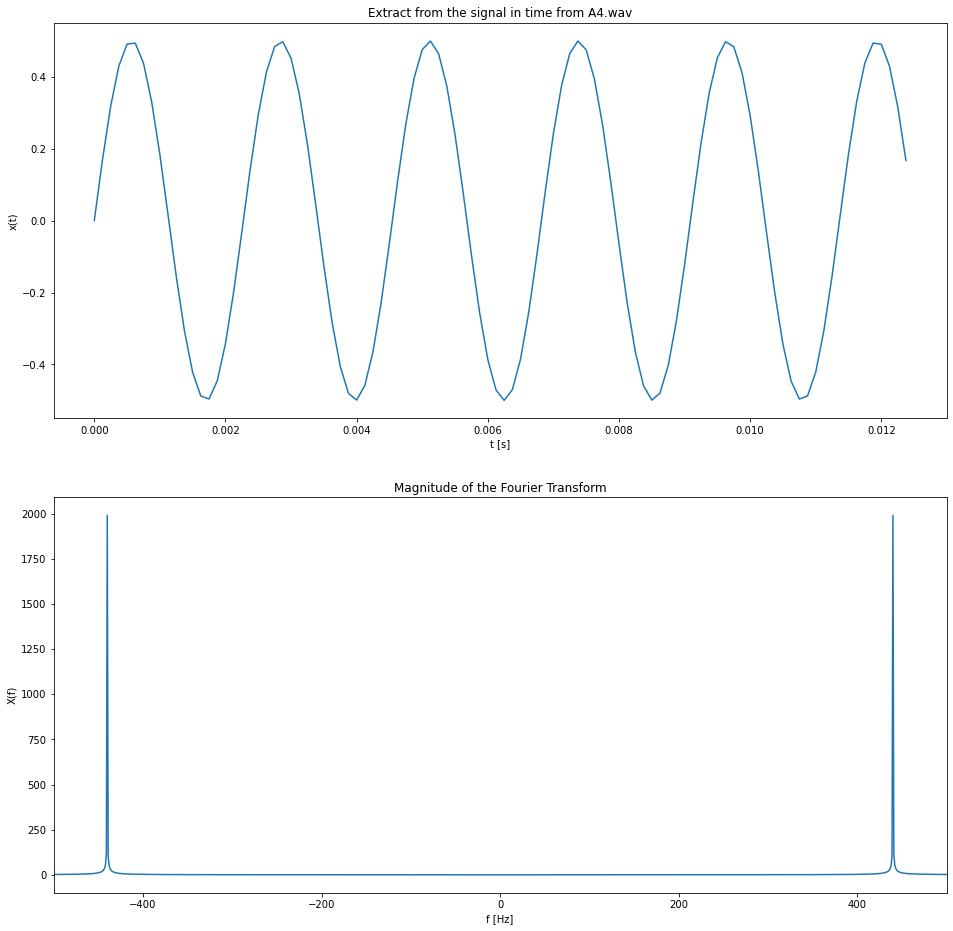

In [15]:
(fs, x) = wf.read("A4.wav")

N = len(x)
T = N/fs

t = np.arange(0,T,1/fs)

y = np.fft.fftshift(np.fft.fft(x))
f = np.fft.fftshift(np.fft.fftfreq(N))*fs


plt.figure(figsize=[16, 16])
plt.subplot(2,1,1)
pl.title('Extract from the signal in time from A4.wav')
plt.plot(t[:100], x[:100])
plt.xlabel('t [s]')
plt.ylabel('x(t)')
plt.subplot(2,1,2)
pl.title('Magnitude of the Fourier Transform')
plt.plot(f, np.abs(y))
plt.xlabel('f [Hz]')
plt.ylabel('X(f)')
plt.xlim([-500,500])
plt.show()

As predicted, we have two diracs at -440Hz and 440Hz in the FT of the signal. 

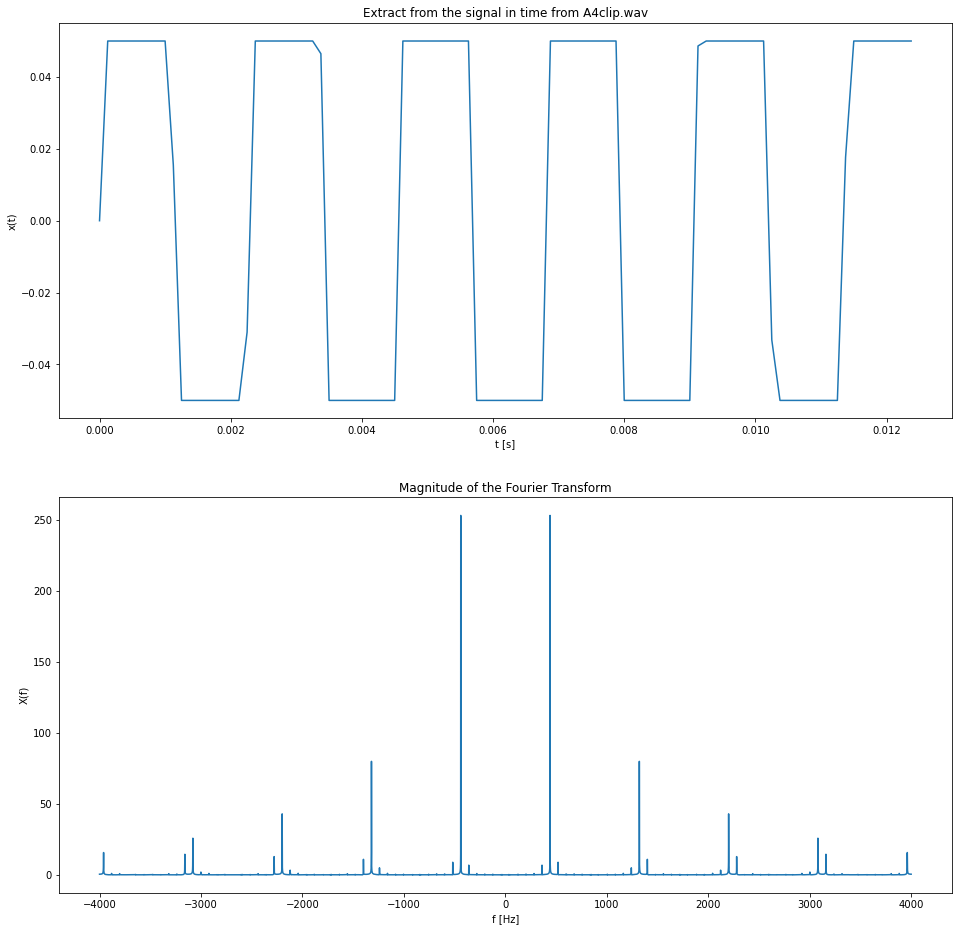

In [4]:
(fs, x) = wf.read("A4clip.wav")

N = len(x)
T = N/fs

t = np.arange(0,T,1/fs)

y = np.fft.fftshift(np.fft.fft(x))
f = np.fft.fftshift(np.fft.fftfreq(N))*fs


plt.figure(figsize=[16, 16])
plt.subplot(2,1,1)
pl.title('Extract from the signal in time from A4clip.wav')
plt.plot(t[:100], x[:100])
plt.xlabel('t [s]')
plt.ylabel('x(t)')
plt.subplot(2,1,2)
pl.title('Magnitude of the Fourier Transform')
plt.plot(f, np.abs(y))
plt.xlabel('f [Hz]')
plt.ylabel('X(f)')
plt.show()

The signal in time looks more like a rectangular signal after having been clipped, and indeed we can observe on the signal in frequency that more harmonies have been added compared to the previous spectrum. There are also other diracs between the main componants of the spectrum but who are far smaller.

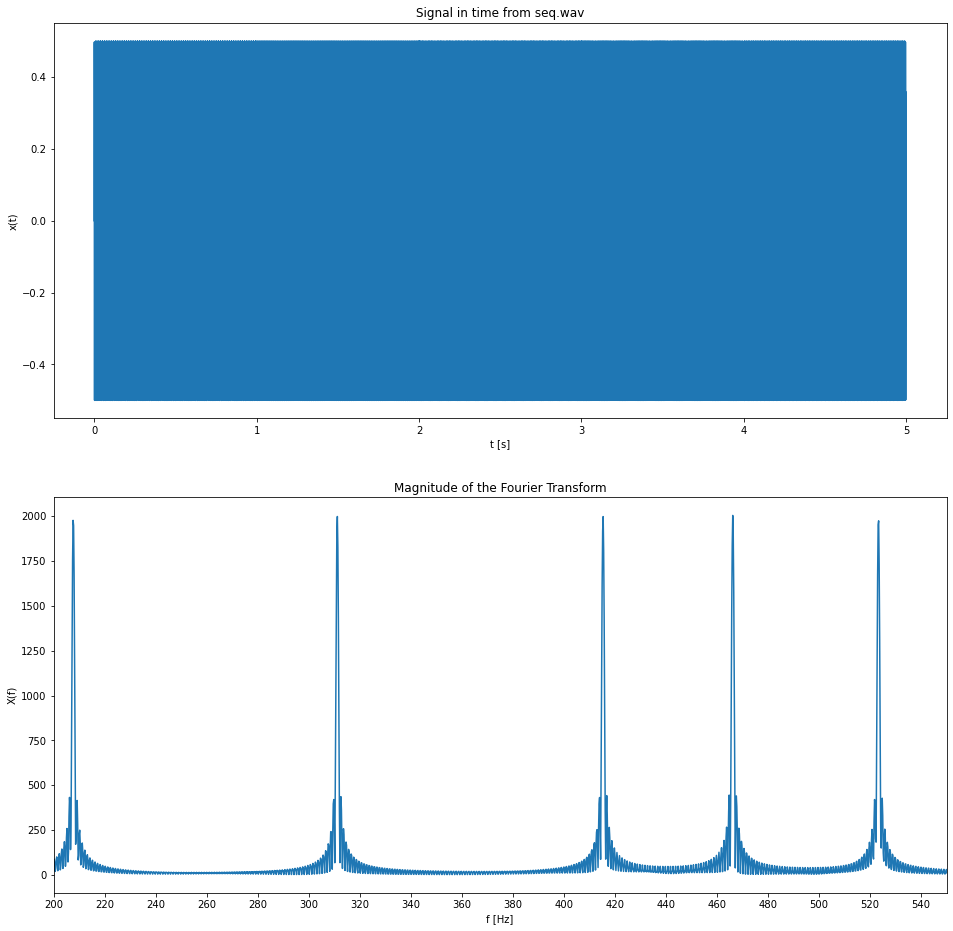

In [51]:
(fs, x) = wf.read("seq.wav")

N = len(x)
T = N/fs

t = np.arange(0,T,1/fs)

y = np.fft.fftshift(np.fft.fft(x))
f = np.fft.fftshift(np.fft.fftfreq(N))*fs


plt.figure(figsize=[16, 16])
plt.subplot(2,1,1)
pl.title('Signal in time from seq.wav')
plt.plot(t, x)
plt.xlabel('t [s]')
plt.ylabel('x(t)')
plt.subplot(2,1,2)
pl.title('Magnitude of the Fourier Transform')
plt.plot(f, np.abs(y))
plt.xlabel('f [Hz]')
plt.ylabel('X(f)')
plt.xlim([200,550])
plt.xticks(np.arange(200,550,20))
plt.show()

The signal in frequency clearly indicates that 5 distinct notes were played, at aproximate frequencies 210, 310, 415, 465 and 525Hz. We can then find that the corresponding MIDI numbers are 56, 63, 68, 70, 72, as predicted (these are respectively the notes A3b, E4b, A4b, B4b and C5). We can hear a little parasite noise at each transition between two notes, corresponding to the discontinuity points of the temporal signal, as we created the signal as a concatenation of several distinct signals.

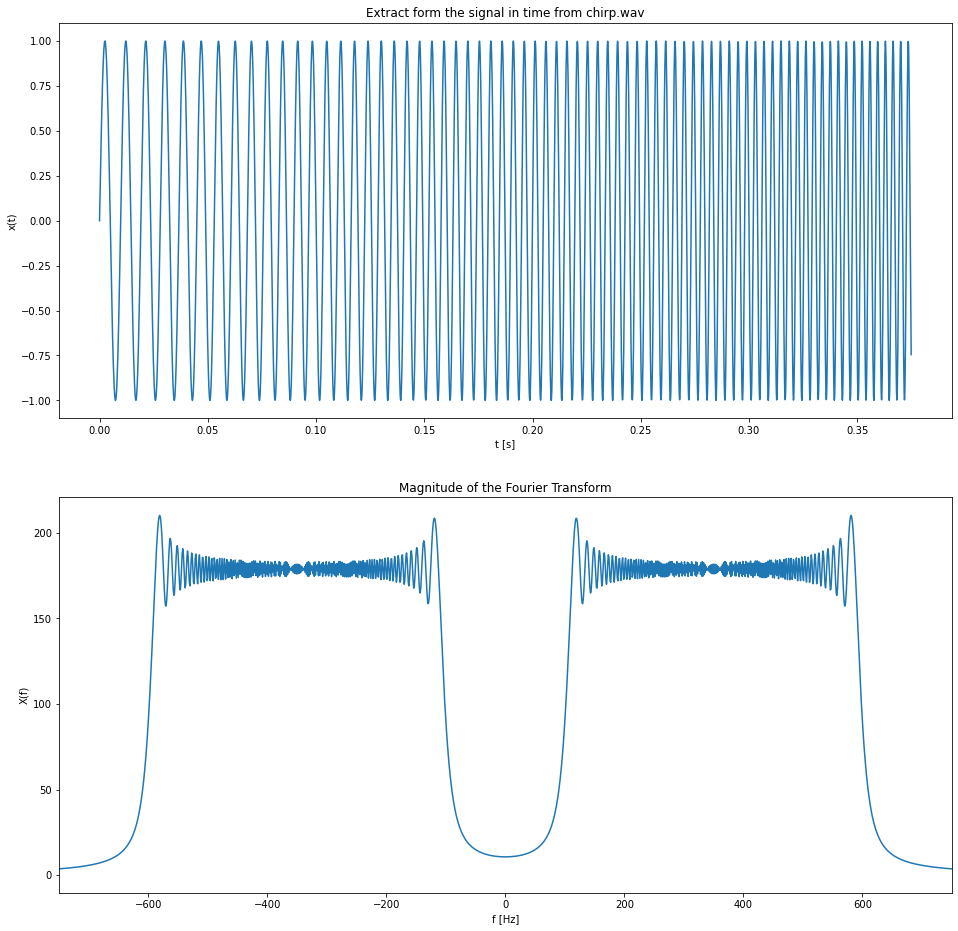

In [12]:
(fs, x) = wf.read("chirp.wav")

N = len(x)
T = N/fs

t = np.arange(0,T,1/fs)

y = np.fft.fftshift(np.fft.fft(x))
f = np.fft.fftshift(np.fft.fftfreq(N))*fs


plt.figure(figsize=[16, 16])
plt.subplot(2,1,1)
pl.title('Extract form the signal in time from chirp.wav')
plt.plot(t[:3000], x[:3000])
plt.xlabel('t [s]')
plt.ylabel('x(t)')
plt.subplot(2,1,2)
pl.title('Magnitude of the Fourier Transform')
plt.plot(f, np.abs(y))
plt.xlabel('f [Hz]')
plt.ylabel('X(f)')
pl.xlim([-750,750])
plt.show()

We can see on the signal in time the frequency gradually increasing. The signal in frequency contains two patterns that seem to look like rectangular patterns, but as a consequence of a modulation in frequency with a finite duration and frequency sweep, there are oscillations and border effects. We can still see the progression in frequency from 100Hz to 600Hz. The constant amplitude on these intervals of the signal in frequency shows that the apparent frequency increased linearly ($\phi(\omega)/\omega$ is linear in $\omega$). 

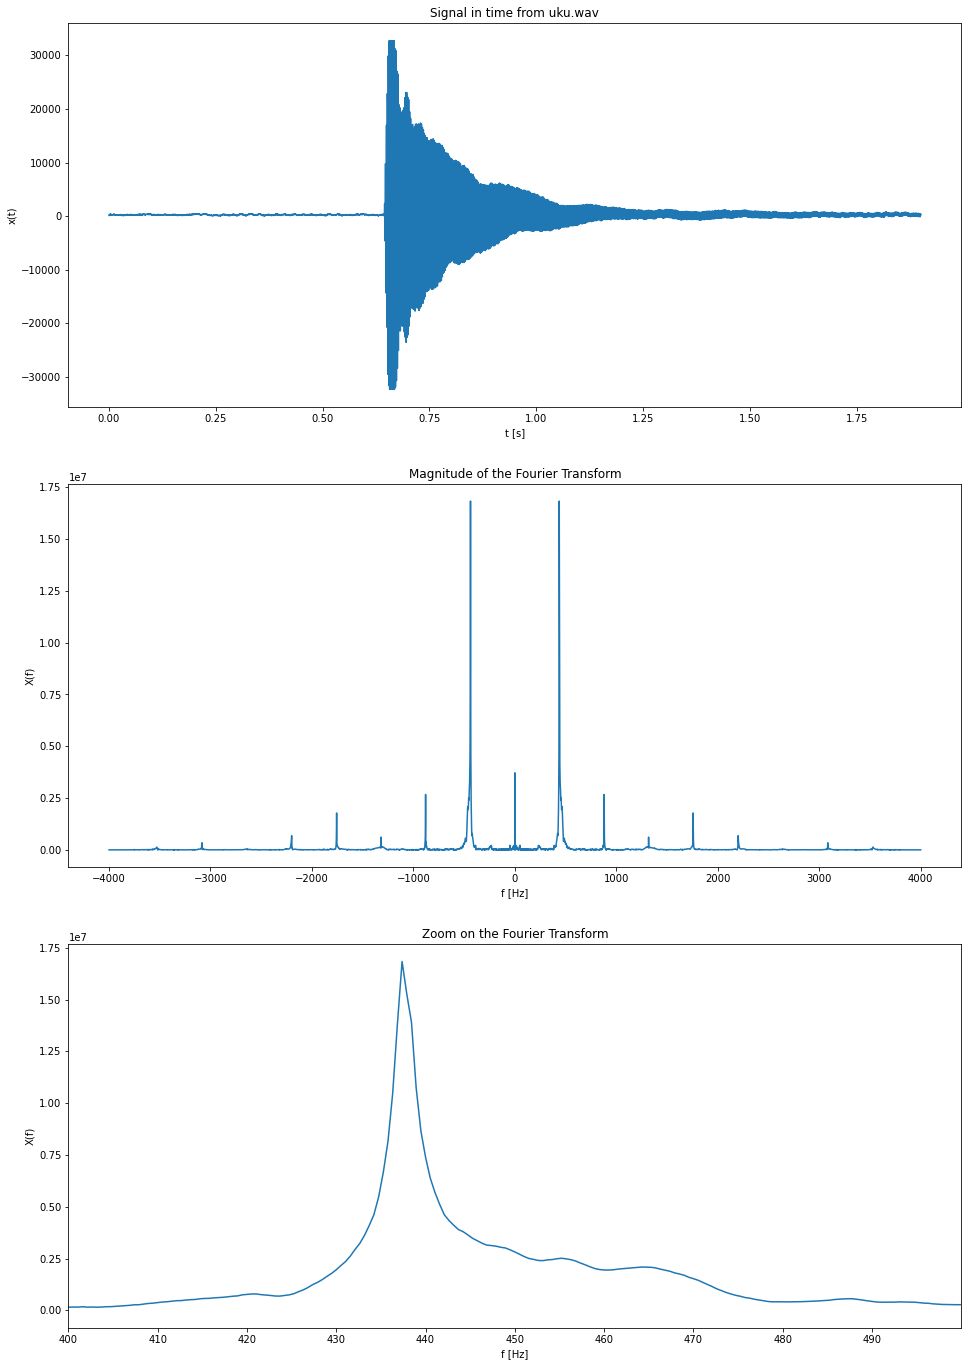

In [46]:
(fs, x) = wf.read("uku.wav")

N = len(x)
T = N/fs

t = np.arange(0,T,1/fs)

y = np.fft.fftshift(np.fft.fft(x))
f = np.fft.fftshift(np.fft.fftfreq(N))*fs


plt.figure(figsize=[16, 24])
plt.subplot(3,1,1)
pl.title('Signal in time from uku.wav')
plt.plot(t, x)
plt.xlabel('t [s]')
plt.ylabel('x(t)')
plt.subplot(3,1,2)
pl.title('Magnitude of the Fourier Transform')
plt.plot(f, np.abs(y))
plt.xlabel('f [Hz]')
plt.ylabel('X(f)')
plt.subplot(3,1,3)
pl.title('Zoom on the Fourier Transform')
plt.plot(f, np.abs(y))
plt.xlabel('f [Hz]')
plt.ylabel('X(f)')
pl.xlim([400,500])
plt.xticks(np.arange(400, 500, 10))
plt.show()

We can see that the note is played at approximatively 440Hz which corresponds to an A4 (MIDI number 69). It is not exactly on $440Hz$ because the ukulele is probably detuned. There are also several harmonies, and there is a dirac at $f=0$, which implies that there is a small constant bias, maybe due to the quality of the recording.

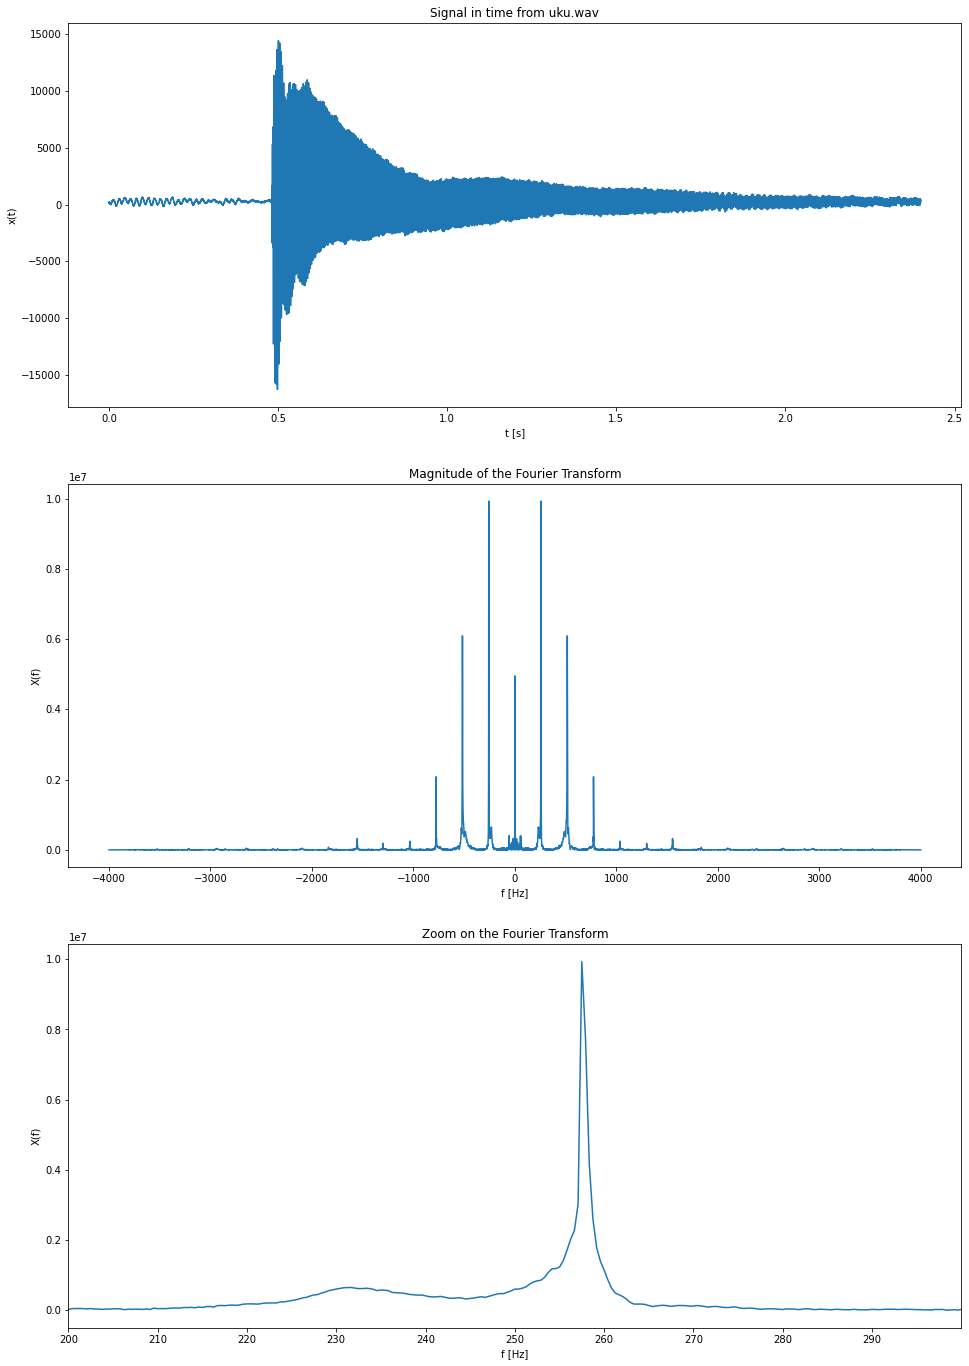

In [47]:
(fs, x) = wf.read("uku2.wav")

N = len(x)
T = N/fs

t = np.arange(0,T,1/fs)

y = np.fft.fftshift(np.fft.fft(x))
f = np.fft.fftshift(np.fft.fftfreq(N))*fs


plt.figure(figsize=[16, 24])
plt.subplot(3,1,1)
pl.title('Signal in time from uku.wav')
plt.plot(t, x)
plt.xlabel('t [s]')
plt.ylabel('x(t)')
plt.subplot(3,1,2)
pl.title('Magnitude of the Fourier Transform')
plt.plot(f, np.abs(y))
plt.xlabel('f [Hz]')
plt.ylabel('X(f)')
plt.subplot(3,1,3)
pl.title('Zoom on the Fourier Transform')
plt.plot(f, np.abs(y))
plt.xlabel('f [Hz]')
plt.ylabel('X(f)')
pl.xlim([200,300])
plt.xticks(np.arange(200, 300, 10))
plt.show()

First, we can see that the signal in time doesn't look horizontally symmetric as uku.wav did. Then we can see that the note played is at (aproximatively, knowing that the ukulele is undertuned) $f=260Hz$ which corresponds to a MIDI number of 60 instead of 69. Concerning the harmonies the first harmonies are too strong and sound dissonants, and they decrease too fast (uku.wav had harmonies until almost $4000Hz$, this drops to $2000Hz$ for uku2.wav), which means that the highest harmonies are unable to be heard and the sound of the uku seems far more poorer than in the first signal. Probably the person who played the note put badly their finger on the fret and muffled the sound of the instrument a little bit.

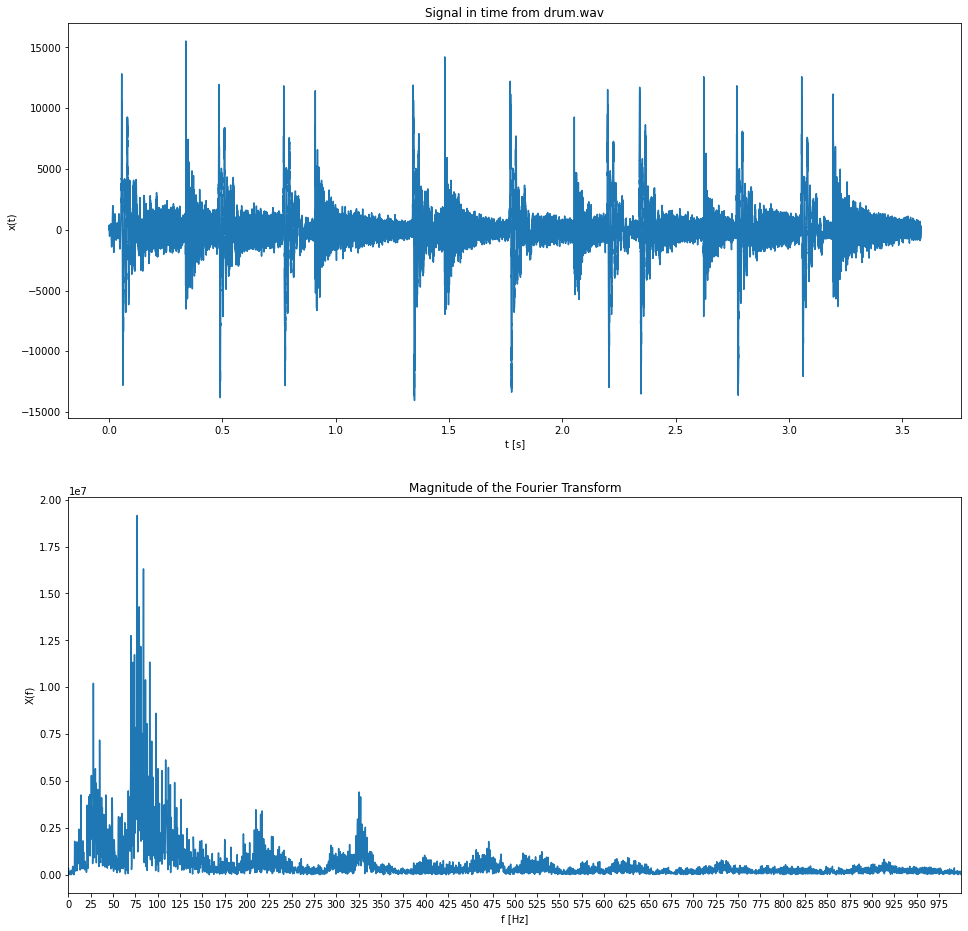

In [41]:
(fs, x) = wf.read("drum.wav")

N = len(x)
T = N/fs

t = np.arange(0,T,1/fs)

y = np.fft.fftshift(np.fft.fft(x))
f = np.fft.fftshift(np.fft.fftfreq(N))*fs


plt.figure(figsize=[16, 16])
plt.subplot(2,1,1)
pl.title('Signal in time from drum.wav')
plt.plot(t, x)
plt.xlabel('t [s]')
plt.ylabel('x(t)')
plt.subplot(2,1,2)
pl.title('Magnitude of the Fourier Transform')
plt.plot(f, np.abs(y))
plt.xlabel('f [Hz]')
plt.ylabel('X(f)')
plt.xlim([0,1000])
plt.xticks(np.arange(0, 1000, 25))

plt.show()

We can hear a kick, a cymbal and a snare, with a little bass note at the beginning. The kick and the cymbal hit at the same time, corresponding to the beats who are almost vertically symmetrical on the temporal graph. The snare hits on the beats who are asymmetrical. On the second graph, we can see that the main frequencies are 325, 220, 80 and 30 Hz.

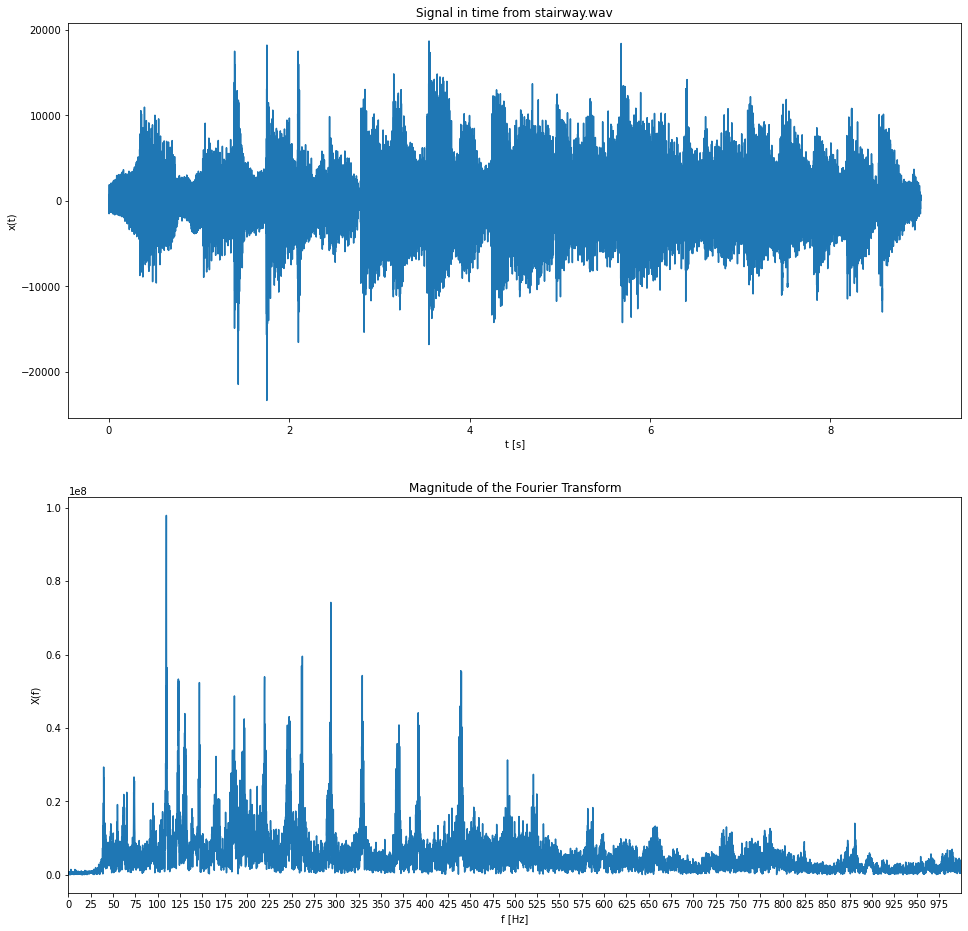

In [42]:
(fs, x) = wf.read("stairway.wav")

N = len(x)
T = N/fs

t = np.arange(0,T,1/fs)

y = np.fft.fftshift(np.fft.fft(x))
f = np.fft.fftshift(np.fft.fftfreq(N))*fs


plt.figure(figsize=[16, 16])
plt.subplot(2,1,1)
pl.title('Signal in time from stairway.wav')
plt.plot(t, x)
plt.xlabel('t [s]')
plt.ylabel('x(t)')
plt.subplot(2,1,2)
pl.title('Magnitude of the Fourier Transform')
plt.plot(f, np.abs(y))
plt.xlabel('f [Hz]')
plt.ylabel('X(f)')
pl.xlim([0,1000])
plt.xticks(np.arange(0, 1000, 25))
plt.show()

The modulation in amplitude on the first graph gives indication when a note is played or a drum is kicked. Each dirac we can see on the second graph corresponds to one note played, the heighth of the dirac gives indication to how long and how many times have the note been played. The highest dirac is at $110Hz$ (MIDI number 45, note A2). This belongs to the range of the bass guitar, it seems quite logical since the notes played by the guitar last much shorter than those played by the bass since the melody of the guitar is quite ellaborated. There may also be small differences in the way these two instruments were separately mixed, and maybe the amplitude is higher for one of the two.

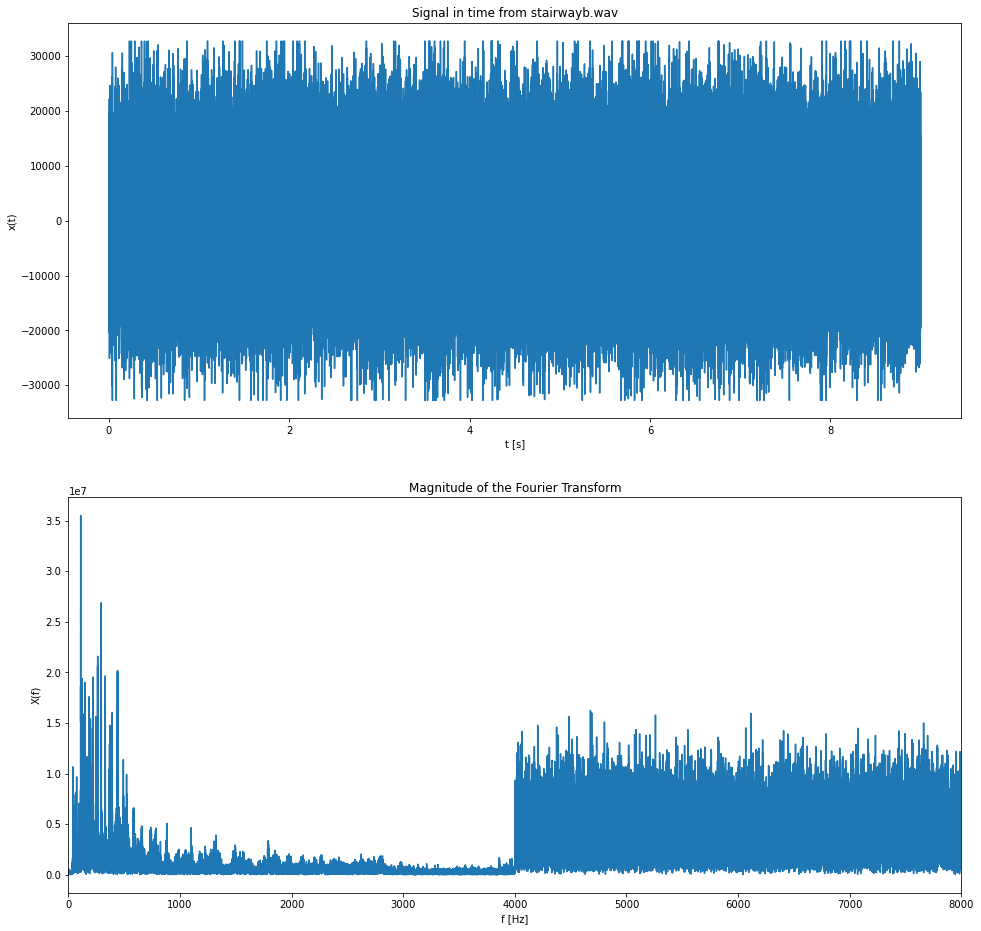

In [13]:
(fs, x) = wf.read("stairwayb.wav")

N = len(x)
T = N/fs

t = np.arange(0,T,1/fs)

y = np.fft.fftshift(np.fft.fft(x))
f = np.fft.fftshift(np.fft.fftfreq(N))*fs


plt.figure(figsize=[16, 16])
plt.subplot(2,1,1)
pl.title('Signal in time from stairwayb.wav')
plt.plot(t, x)
plt.xlabel('t [s]')
plt.ylabel('x(t)')
plt.subplot(2,1,2)
pl.title('Magnitude of the Fourier Transform')
plt.plot(f, np.abs(y))
plt.xlabel('f [Hz]')
plt.ylabel('X(f)')
pl.xlim([0,8000])

plt.show()

The first graph seems more saturated than that of stairway.wav, and we can't read on this one when the drums kick. On the second graph, we can see that the noise is located at the frequencies higher than $4000Hz$.The part of the graph in low frequencies doesn't seem to change. The noise seems to have been put artificially since the signal in frequency increases very abruptly at $4000Hz$.

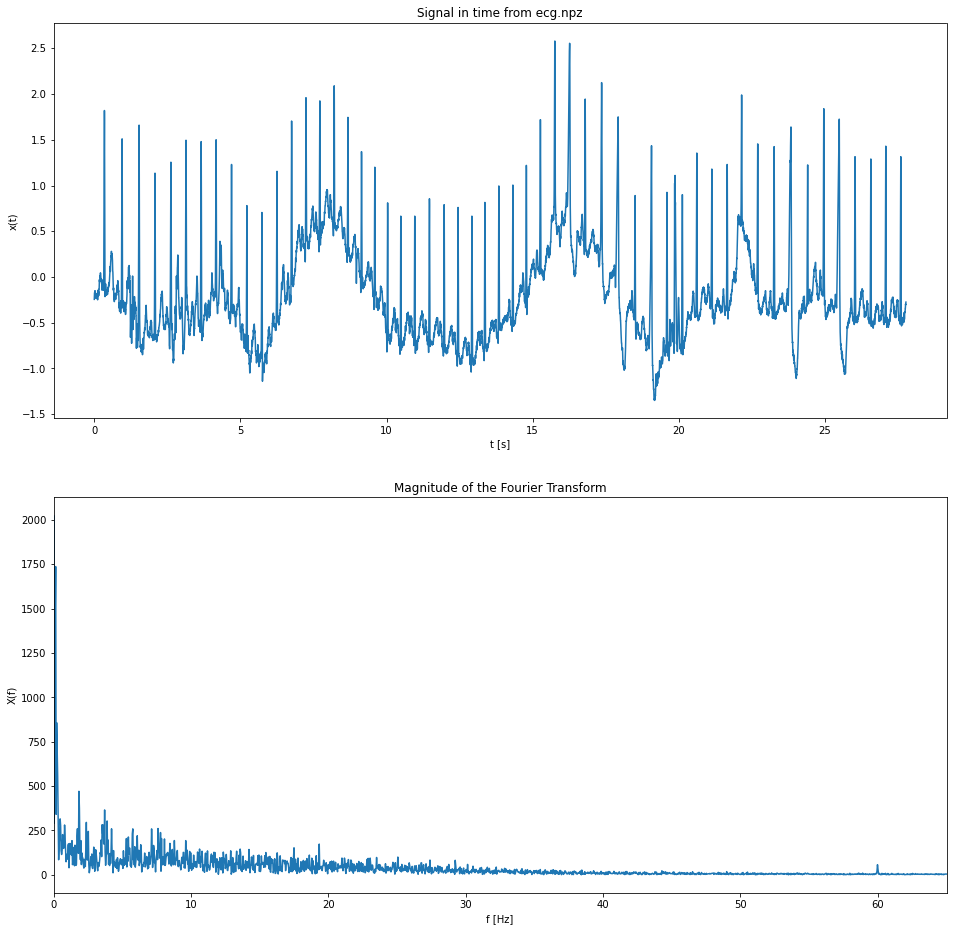

In [14]:
data = np.load("ecg.npz")
fs = data['fs']
x = data['x']

N = len(x)
T = N/fs

t = np.arange(0,T,1/fs)

y = np.fft.fftshift(np.fft.fft(x))
f = np.fft.fftshift(np.fft.fftfreq(N))*fs


plt.figure(figsize=[16, 16])
plt.subplot(2,1,1)
pl.title('Signal in time from ecg.npz')
plt.plot(t, x)
plt.xlabel('t [s]')
plt.ylabel('x(t)')
plt.subplot(2,1,2)
pl.title('Magnitude of the Fourier Transform')
plt.plot(f, np.abs(y))
plt.xlabel('f [Hz]')
plt.ylabel('X(f)')
pl.xlim([0,65])
plt.show()

We can see on the signal in time each heartbeat. There are 38 beats in 20 seconds, so the patient is at 114bpm which is very high for when one isn't doing sports. Moreover there is a slight irregularity in the heartbeats at aproximatively $t=20s$ (there is one beat that shouldn't be there). All this probably means that the patient has a bad heart, or a cardiac disease. The variation on the temporal signal at lower frequency than the heartbeats may be due to the breathing of the patient.

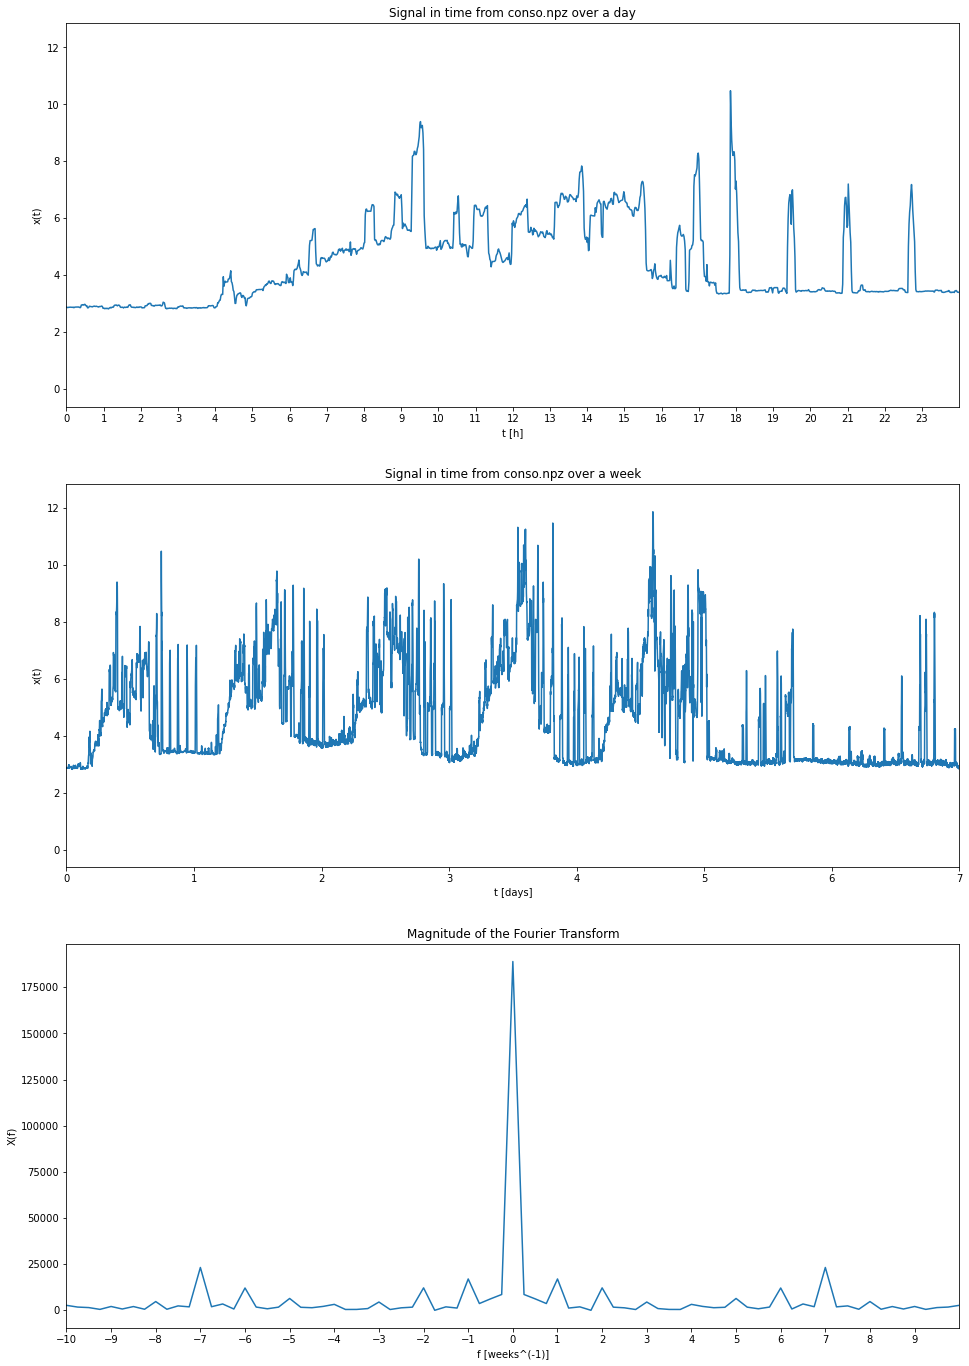

In [27]:
data = np.load("conso.npz")
fs = data['fs']
x = data['x']

N = len(x)
T = N/fs

t = np.arange(0,T,1/fs)

y = np.fft.fftshift(np.fft.fft(x))
f = np.fft.fftshift(np.fft.fftfreq(N))*fs


plt.figure(figsize=[16, 24])
plt.subplot(3,1,1)
pl.title('Signal in time from conso.npz over a day')
plt.plot(t/3600, x)
pl.xlim([0,24])
plt.xlabel('t [h]')
plt.ylabel('x(t)')
plt.xticks(np.arange(0, 24))
plt.subplot(3,1,2)
pl.title('Signal in time from conso.npz over a week')
plt.plot(t/86400, x)
plt.xlabel('t [days]')
plt.ylabel('x(t)')
pl.xlim([0,7])
plt.subplot(3,1,3)
pl.title('Magnitude of the Fourier Transform')
plt.plot(f*604800, np.abs(y))
plt.xlabel('f [weeks^(-1)]')
plt.ylabel('X(f)')
pl.xlim([-10,10])
plt.xticks(np.arange(-10, 10))
plt.show()

Over a day, we can see that the power usage of the Drahi-X building has an increase in average value from 4:30 AM to 5:30 PM, corresponding to the daily activity of the buiding. At night, there are regular impulses every 1h30 that might be due to heating or security systems. Over a week, we can see that on the last two days, besides the regular impulses, the signal looks very flat. This is due to the fact that no one works on week end. 
On the frequency spectrum, we can see first a high static gain due to the fact that the Drahi-X is always consuming power, at least for heating and security systems. We can also see two spikes corresponding to a frequency of once a week and seven times a week (which means once a day), that describes the weekly and daily regularity in the activity of the center.

## 3 - Digital Filtering

### 3.1 - Ideal Filtering

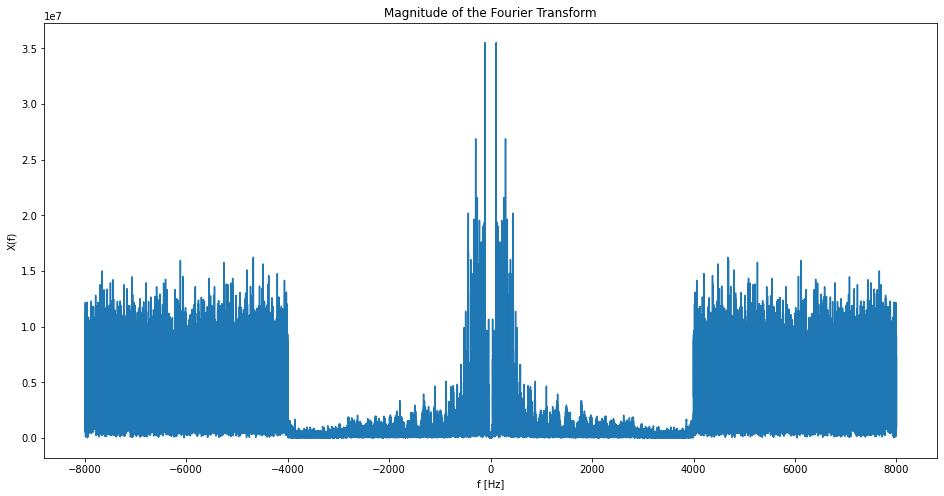

In [274]:
(fs, x) = wf.read("stairwayb.wav")

N = len(x)
T = N/fs

t = np.arange(0,T,1/fs)

y = np.fft.fftshift(np.fft.fft(x))
f = np.fft.fftshift(np.fft.fftfreq(N))*fs

plt.figure(figsize=[16, 8])
pl.title('Magnitude of the Fourier Transform')
plt.plot(f, np.abs(y))
plt.xlabel('f [Hz]')
plt.ylabel('X(f)')
plt.show()

Noise seems to appear after 4000 Hz, I think then that $f_c=3950Hz$ seems to be a good cutoff frequency for an ideal filter. 

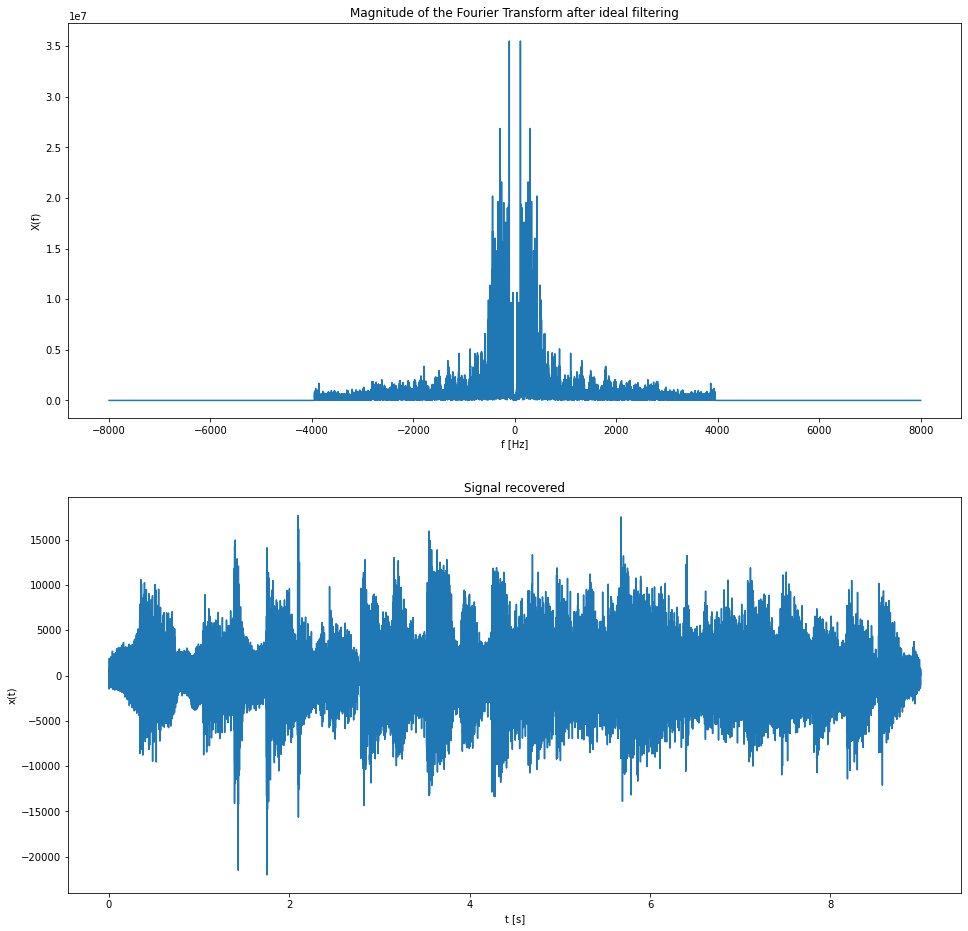

In [107]:
for i in range(len(f)) :
    if np.abs(f[i]) > 3950 :
        y[i] = 0
 
x = np.real(np.fft.ifft(np.fft.ifftshift(y)))

plt.figure(figsize=[16, 16])
plt.subplot(2,1,1)
pl.title('Magnitude of the Fourier Transform after ideal filtering')
plt.plot(f, np.abs(y))
plt.xlabel('f [Hz]')
plt.ylabel('X(f)')
plt.subplot(2,1,2)
pl.title('Signal recovered')
plt.plot(t, x)
plt.xlabel('t [s]')
plt.ylabel('x(t)')
plt.show()

In [108]:
wf.write("denoised.wav", fs, x/30000)

There is no more noise but the sound quality is much more poorer than the original, a lot of harmonies have been lost, especially those related to the ring of the steel string from the guitar or the cymbals.

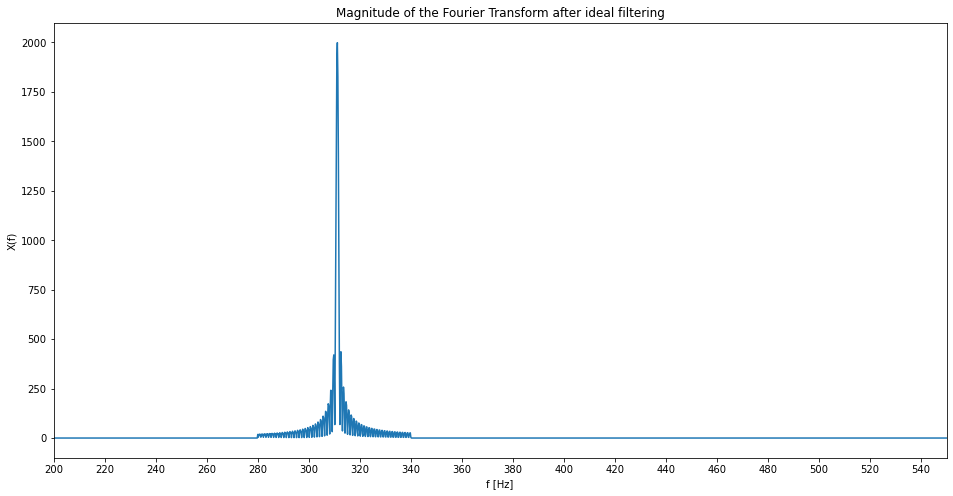

In [114]:
(fs, x) = wf.read("seq.wav")

N = len(x)
T = N/fs

y = np.fft.fftshift(np.fft.fft(x))
f = np.fft.fftshift(np.fft.fftfreq(N))*fs

for i in range(len(y)) :
    if (f[i]<280 or f[i]>340) :
        y[i] = 0
        
x = np.real(np.fft.ifft(np.fft.ifftshift(y)))
        
plt.figure(figsize=[16, 8])
pl.title('Magnitude of the Fourier Transform after ideal filtering')
plt.plot(f, np.abs(y))
plt.xlabel('f [Hz]')
plt.ylabel('X(f)')
plt.xlim([200,550])
plt.xticks(np.arange(200,550,20))
plt.show()

In [115]:
wf.write("onenote.wav", fs, x)

We hear now only the last note, but there are still some parasite sounds in the first seconds, due to the transition between different notes which is responsible for part of the spectrum components that have been kept.

The static gain of the ideal low pass filter is 4.163336342344337e-17
The static gain of the ideal high pass filter is 1.0


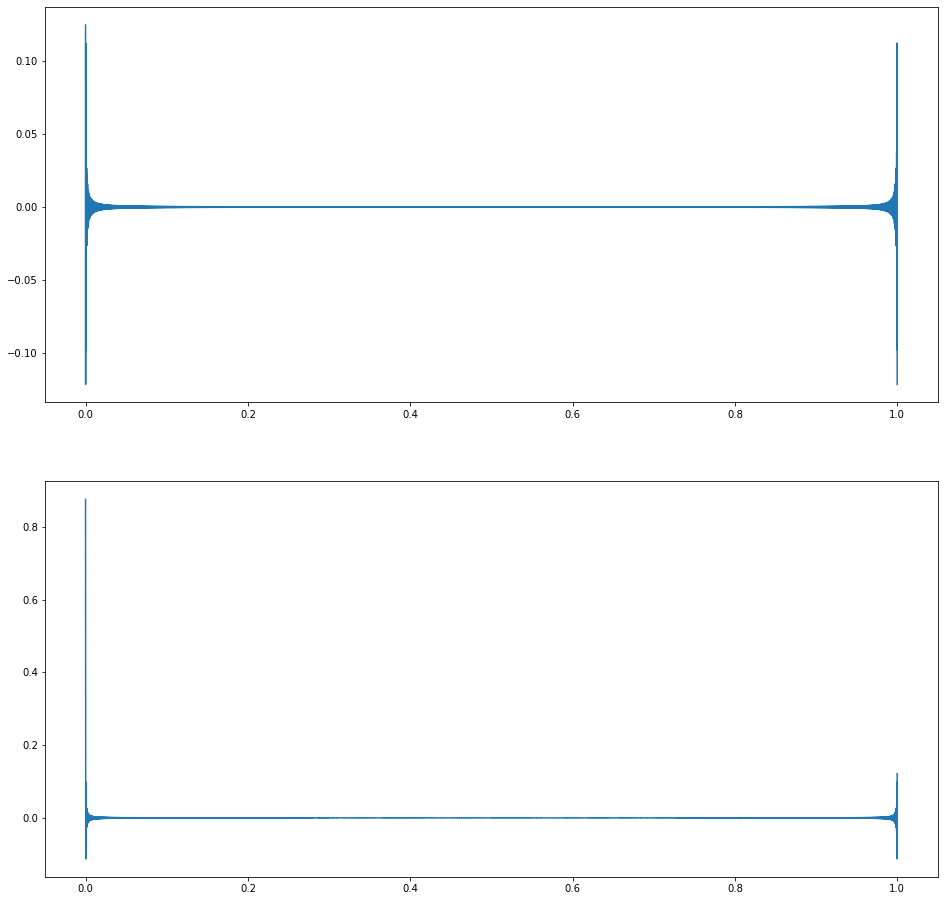

In [11]:
fs = 8000
N = fs

y1 = np.zeros(N)
y2 = np.zeros(N)
f = np.fft.fftshift(np.fft.fftfreq(N))*fs

for i in range(len(f)) :
    if (np.abs(f[i]) < 500) :
        y1[i] = 1
    else :
        y2[i] = 1

x1 = np.fft.ifft(y1)
x2 = np.fft.ifft(y2)
t = np.arange(0,1,1/fs)

g1 = np.sum(np.real(x1))
g2 = np.sum(np.real(x2))
print("The static gain of the ideal low pass filter is", g1)
print("The static gain of the ideal high pass filter is", g2)


plt.figure(figsize=[16, 16])
plt.subplot(2,1,1)
plt.plot(t,np.real(x1))
plt.subplot(2,1,2)
plt.plot(t,np.real(x2))

PB : gain statique du passe bas et du passe haut échangés

## 3.2 - Digital Filter Design

In [54]:
(b, a) = sp.signal.butter(2,0.2,fs=1.) #returns (b,a)

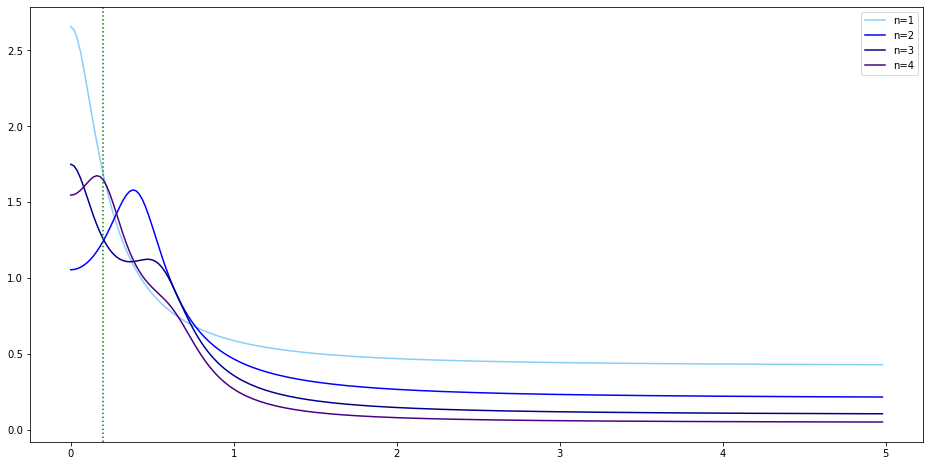

In [94]:
def freq_resp(a,b,f) :
    h = []
    num = 0
    denom = 0
    M = len(b)
    N = len(a)
    for fi in f :
        num = 0
        denom = 0
        for i in range(M) :
            num *= 1j*fi
            num += b[i]
        for j in range(N) :
            denom *= 1j*fi
            denom += a[j]
        h.append(num/denom)
    return np.array(h)

f = np.arange(0., 5., 0.02)

plt.figure(figsize=[16, 8])
(b, a) = sp.signal.butter(1,0.2,fs=1.) 
pl.plot(f, np.abs(freq_resp(a, b, f)), c='lightskyblue', label='n=1')
(b, a) = sp.signal.butter(2,0.2,fs=1.) 
pl.plot(f, np.abs(freq_resp(a, b, f)), c='blue', label='n=2')
(b, a) = sp.signal.butter(3,0.2,fs=1.) 
pl.plot(f, np.abs(freq_resp(a, b, f)), c='darkblue', label='n=3')
(b, a) = sp.signal.butter(4,0.2,fs=1.) 
pl.plot(f, np.abs(freq_resp(a, b, f)), c='indigo', label='n=4')
pl.legend()
plt.axvline(0.2, linestyle=':', color='green')
pl.show()

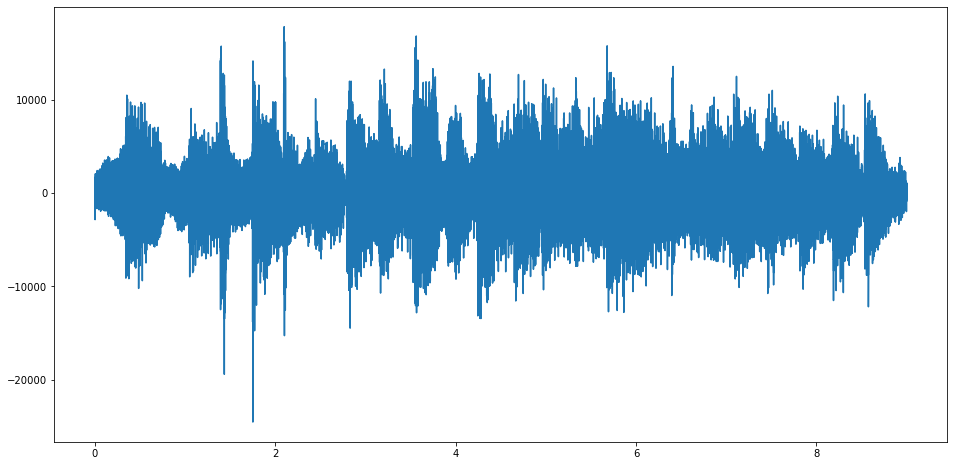

In [43]:
(fs, x) = wf.read("stairwayb.wav")
(b, a) = sp.signal.butter(20,3800/fs,fs=1.)

y = sp.signal.lfilter(b, a, x)

N = len(x)
T = N/fs

t = np.arange(0,T,1/fs)

plt.figure(figsize=[16, 8])
pl.plot(t, y)
wf.write("stairwaybutter.wav", fs, y/25000)

The corresponding frequency used is 3800/fs (I decreased the value of $3950Hz$ designated before because this filter isn't ideal and has a bandwidth which is not null). Even at order 1, we can start to distinguish certain drum beats. Musically, at order 20, we still hear some noise but it is more discrete and the sound quality of the instrument is not as bad as with the ideal filter, so it doesn't look like a bad compromise.

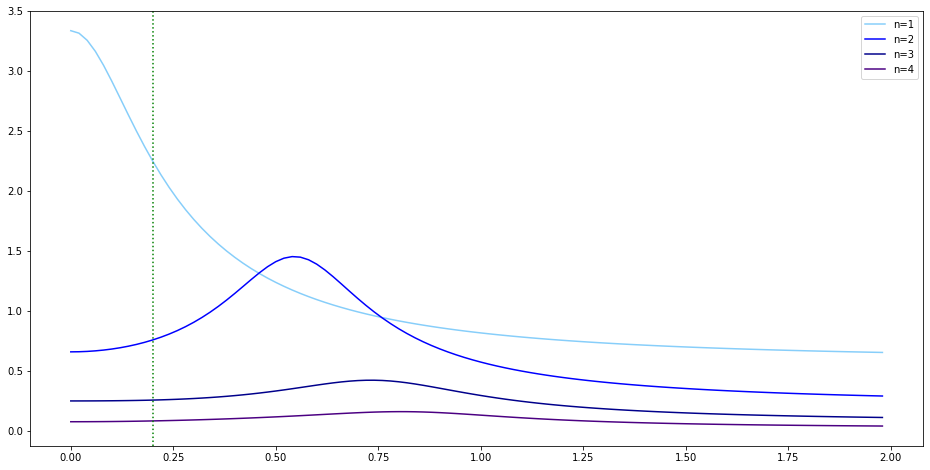

In [123]:
(b, a) = sp.signal.cheby1(4,1,0.2,fs=1.)

f = np.arange(0., 2., 0.02)

plt.figure(figsize=[16, 8])
(b, a) = sp.signal.cheby1(1,1,0.2,fs=1.)
pl.plot(f, np.abs(freq_resp(a, b, f)), c='lightskyblue', label='n=1')
(b, a) = sp.signal.cheby1(2,1,0.2,fs=1.) 
pl.plot(f, np.abs(freq_resp(a, b, f)), c='blue', label='n=2')
b, a = signal.cheby1(3, 1, 0.2, fs=1.)
pl.plot(f, np.abs(freq_resp(a, b, f)), c='darkblue', label='n=3')
(b, a) = sp.signal.cheby1(4,1,0.2,fs=1.) 
pl.plot(f, np.abs(freq_resp(a, b, f)), c='indigo', label='n=4')
pl.legend()
plt.axvline(0.2, linestyle=':', color='green')
pl.show()

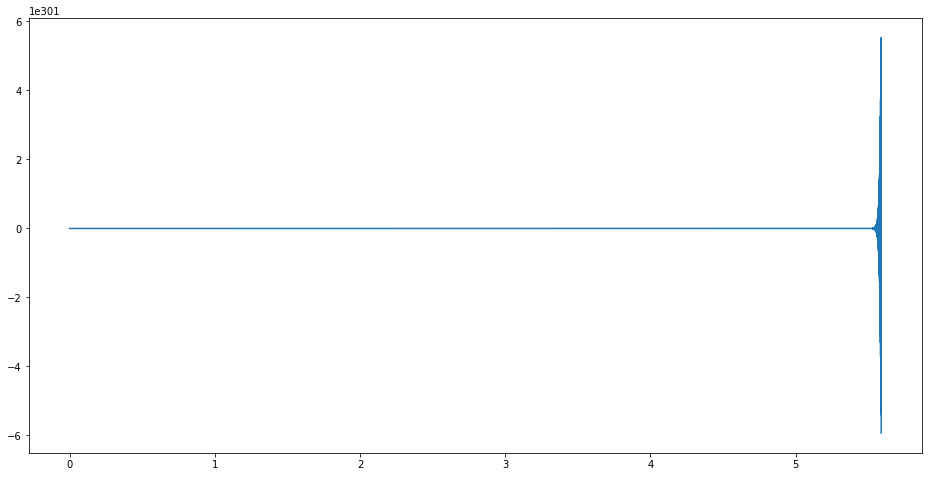

In [49]:
(fs, x) = wf.read("stairwayb.wav")
(b, a) = sp.signal.cheby1(34,1,3800/fs,fs=1.)

y = sp.signal.lfilter(b, a, x)

N = len(x)
T = N/fs

t = np.arange(0,T,1/fs)

plt.figure(figsize=[16, 8])
pl.plot(t, y)

For $n \geq 34$, we can notice that the signal is incorrectly reconstructed and can't be exploited. I think that it might be due to computational problems using too high exponents.

### 3.3 - Source separation and denoising

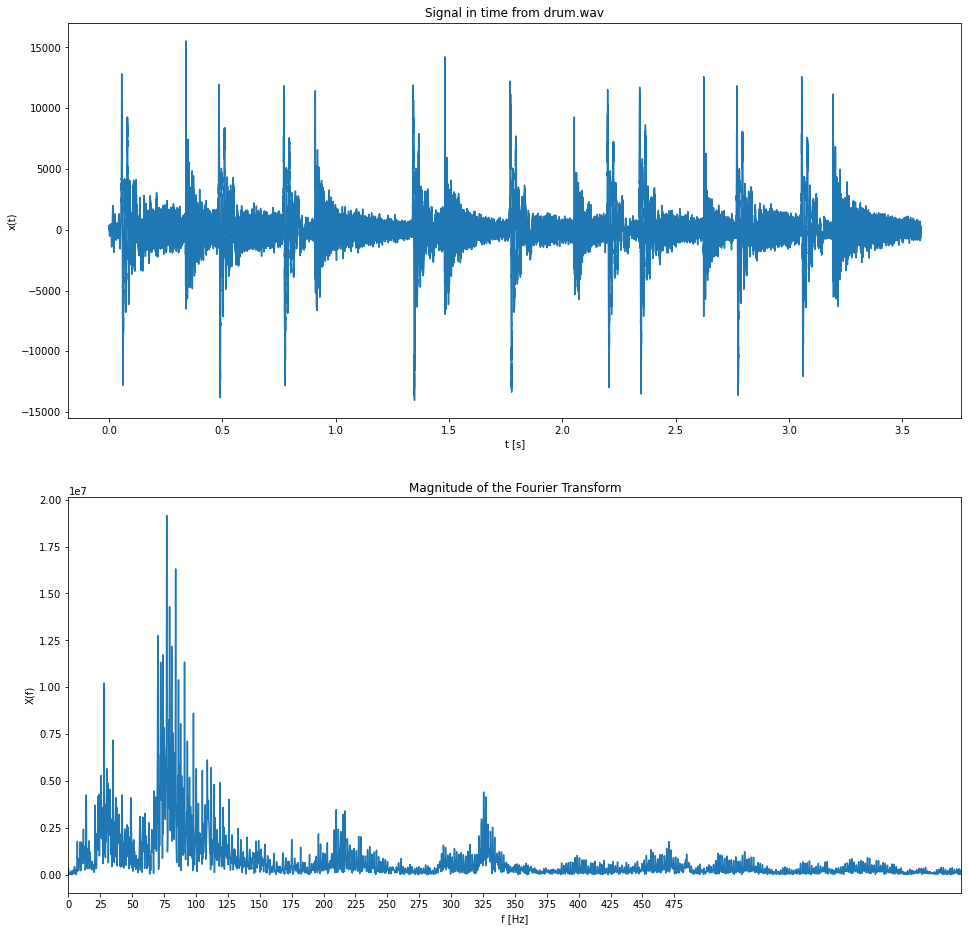

In [234]:
(fs, x) = wf.read("drum.wav")

N = len(x)
T = N/fs

t = np.arange(0,T,1/fs)

y = np.fft.fftshift(np.fft.fft(x))
f = np.fft.fftshift(np.fft.fftfreq(N))*fs


plt.figure(figsize=[16, 16])
plt.subplot(2,1,1)
pl.title('Signal in time from drum.wav')
plt.plot(t, x)
plt.xlabel('t [s]')
plt.ylabel('x(t)')
plt.subplot(2,1,2)
pl.title('Magnitude of the Fourier Transform')
plt.plot(f, np.abs(y))
plt.xlabel('f [Hz]')
plt.ylabel('X(f)')
plt.xlim([0,700])
plt.xticks(np.arange(0, 500, 25))

plt.show()

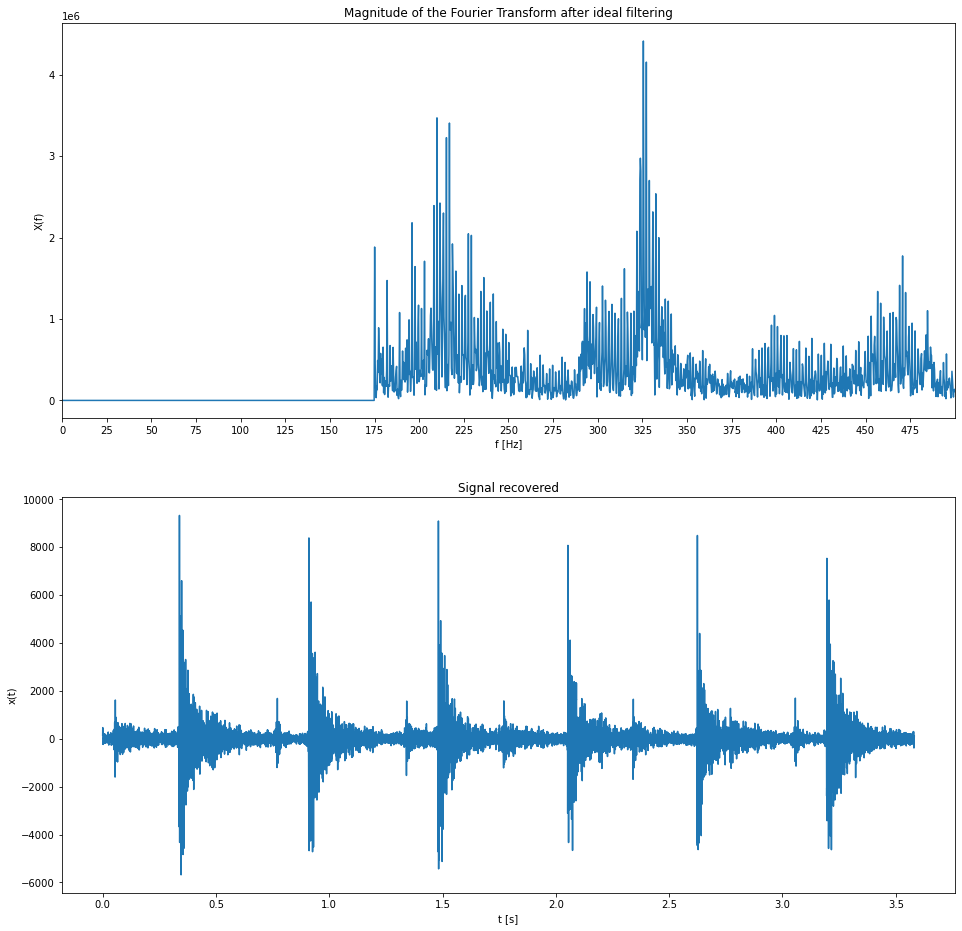

In [235]:
for i in range(len(f)) :
    #if (np.abs(f[i]) > 150)  and (np.abs(f[i]) < 700) or (np.abs(f[i]) < 50):
    #if (np.abs(f[i]) < 1500) :
    if (np.abs(f[i]) < 175)  or (np.abs(f[i]) > 1500) :
        y[i] = 0
 
x = np.real(np.fft.ifft(np.fft.ifftshift(y)))

plt.figure(figsize=[16, 16])
plt.subplot(2,1,1)
pl.title('Magnitude of the Fourier Transform after ideal filtering')
plt.plot(f, np.abs(y))
plt.xlabel('f [Hz]')
plt.ylabel('X(f)')
plt.xlim([0,500])
plt.xticks(np.arange(0, 500, 25))
plt.subplot(2,1,2)
pl.title('Signal recovered')
plt.plot(t, x)
plt.xlabel('t [s]')
plt.ylabel('x(t)')
plt.show()

In [236]:
wf.write("filtereddrum1.wav", fs, x/8000)

Experimentally, I managed to divide the signal into three groups. First, for $f<175$ the bass and the kick (bass.wav), for $175<f<1500$ the snare (snare.wav) and for $f>1500$ the cymbals (cymbals.wav). As before, the sound quality of each part is mediocre since most harmonies have been cut off.

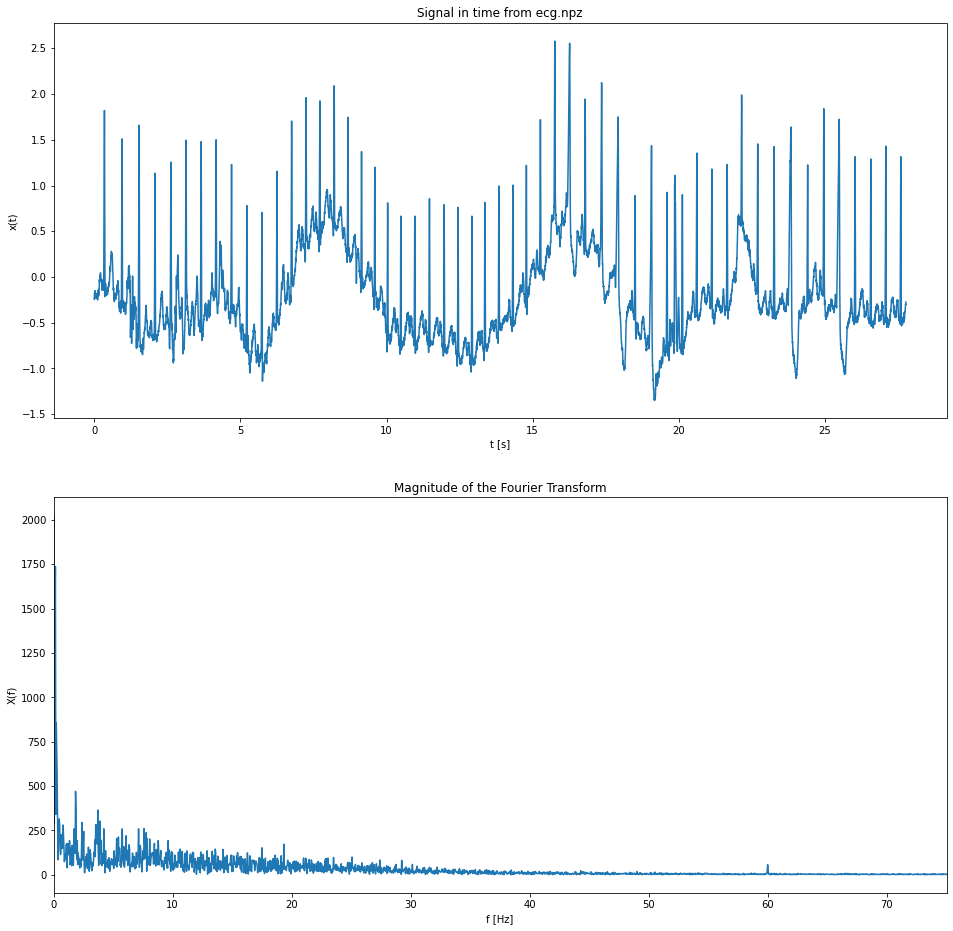

In [300]:
data = np.load("ecg.npz")
fs = data['fs']
x = data['x']

N = len(x)
T = N/fs

t = np.arange(0,T,1/fs)

y = np.fft.fftshift(np.fft.fft(x))
f = np.fft.fftshift(np.fft.fftfreq(N))*fs



plt.figure(figsize=[16, 16])
plt.subplot(2,1,1)
pl.title('Signal in time from ecg.npz')
plt.plot(t, x)
plt.xlabel('t [s]')
plt.ylabel('x(t)')
plt.subplot(2,1,2)
pl.title('Magnitude of the Fourier Transform')
plt.plot(f, np.abs(y))
plt.xlabel('f [Hz]')
plt.ylabel('X(f)')
pl.xlim([0,75])
#pl.xticks(np.arange(330, 530, 10))
plt.show()

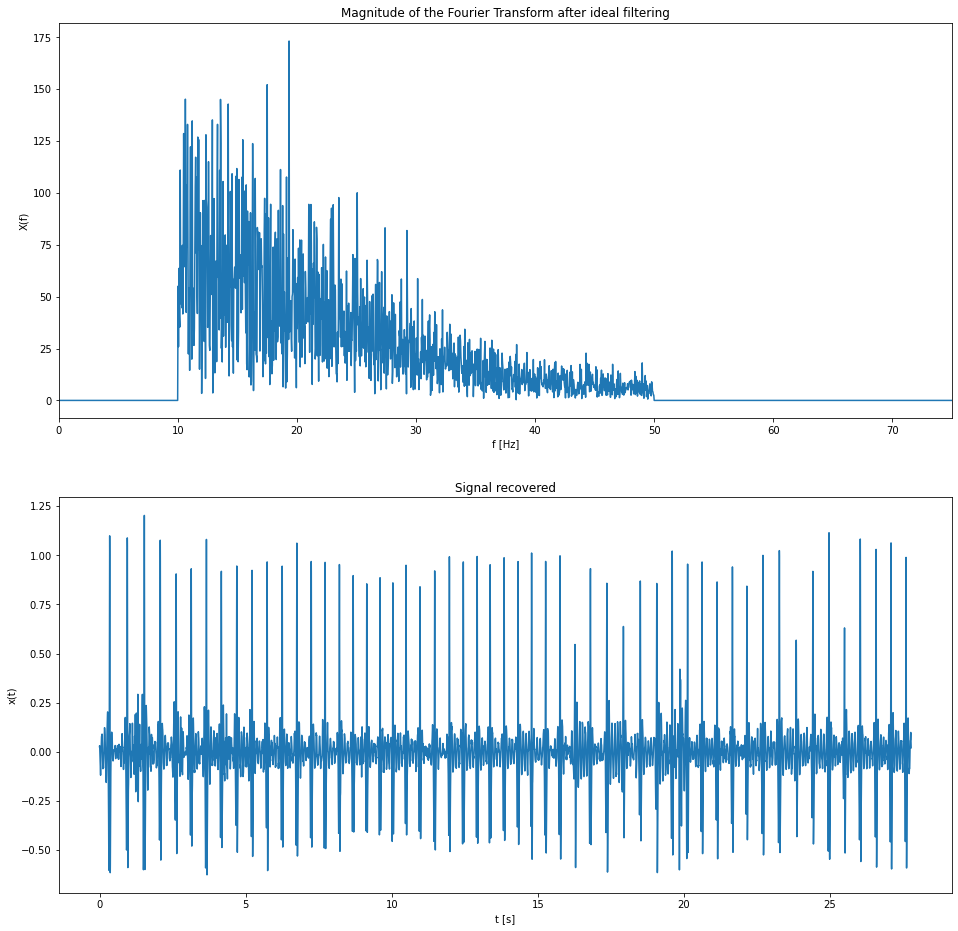

In [301]:
for i in range(len(f)) :
    if (np.abs(f[i]) < 10)  or (np.abs(f[i]) > 50) :
        y[i] = 0
 
x = np.real(np.fft.ifft(np.fft.ifftshift(y)))

plt.figure(figsize=[16, 16])
plt.subplot(2,1,1)
pl.title('Magnitude of the Fourier Transform after ideal filtering')
plt.plot(f, np.abs(y))
plt.xlabel('f [Hz]')
plt.ylabel('X(f)')
plt.xlim([0,75])
plt.subplot(2,1,2)
pl.title('Signal recovered')
plt.plot(t, x)
plt.xlabel('t [s]')
plt.ylabel('x(t)')
plt.show()

Using an ideal bandpass filter [10,50], we can flatten the breathing movement and make the heartbeats easier to distinguish. We can see much more clearly in this latter graphe the irregularity at 20s.

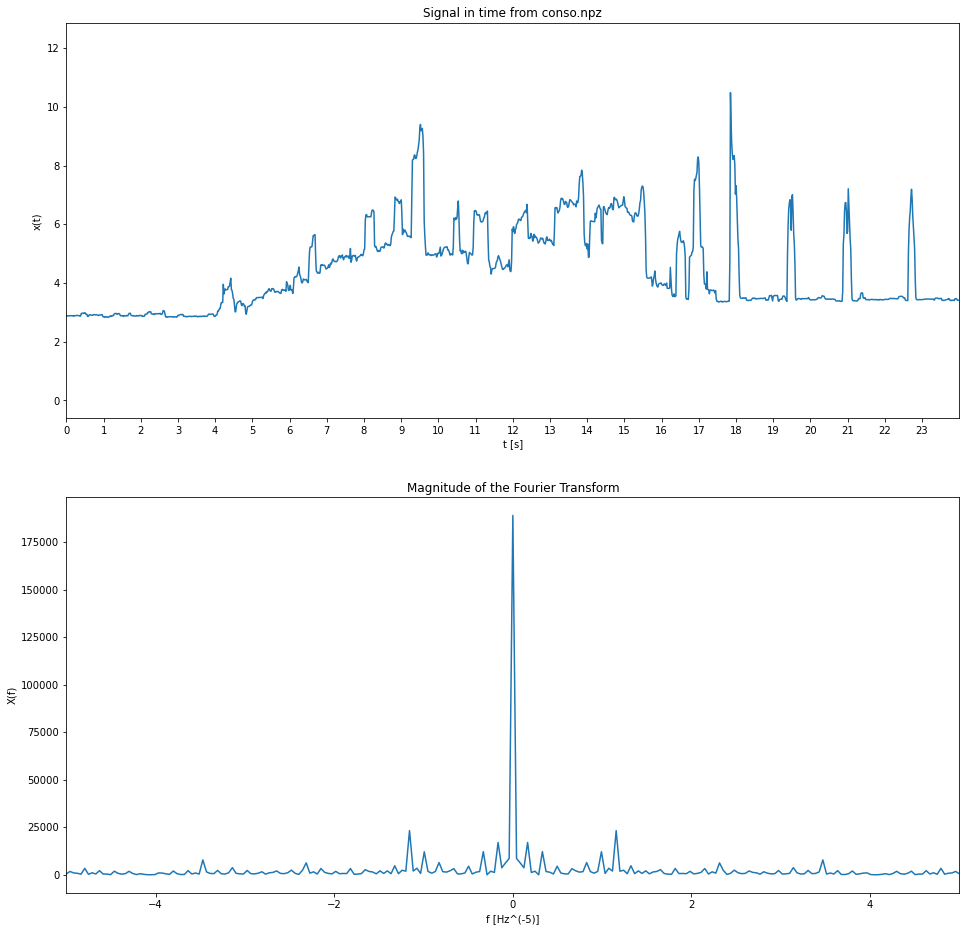

In [51]:
data = np.load("conso.npz")
fs = data['fs']
x = data['x']

N = len(x)
T = N/fs

t = np.arange(0,T,1/fs)

y = np.fft.fftshift(np.fft.fft(x))
f = np.fft.fftshift(np.fft.fftfreq(N))*fs


plt.figure(figsize=[16, 16])
plt.subplot(2,1,1)
pl.title('Signal in time from conso.npz')
#1 jour = 86400s
#1 semaine = 604800
plt.plot(t/3600, x)
plt.xlabel('t [s]')
plt.ylabel('x(t)')
pl.xlim([0,24])
pl.xticks(np.arange(0,24))
#pl.xlim([0,86400])
#pl.xlim([0,604800])
plt.subplot(2,1,2)
pl.title('Magnitude of the Fourier Transform')
plt.plot(f*100000, np.abs(y))
plt.xlabel('f [Hz^(-5)]')
plt.ylabel('X(f)')
pl.xlim([-5,5])
plt.show()

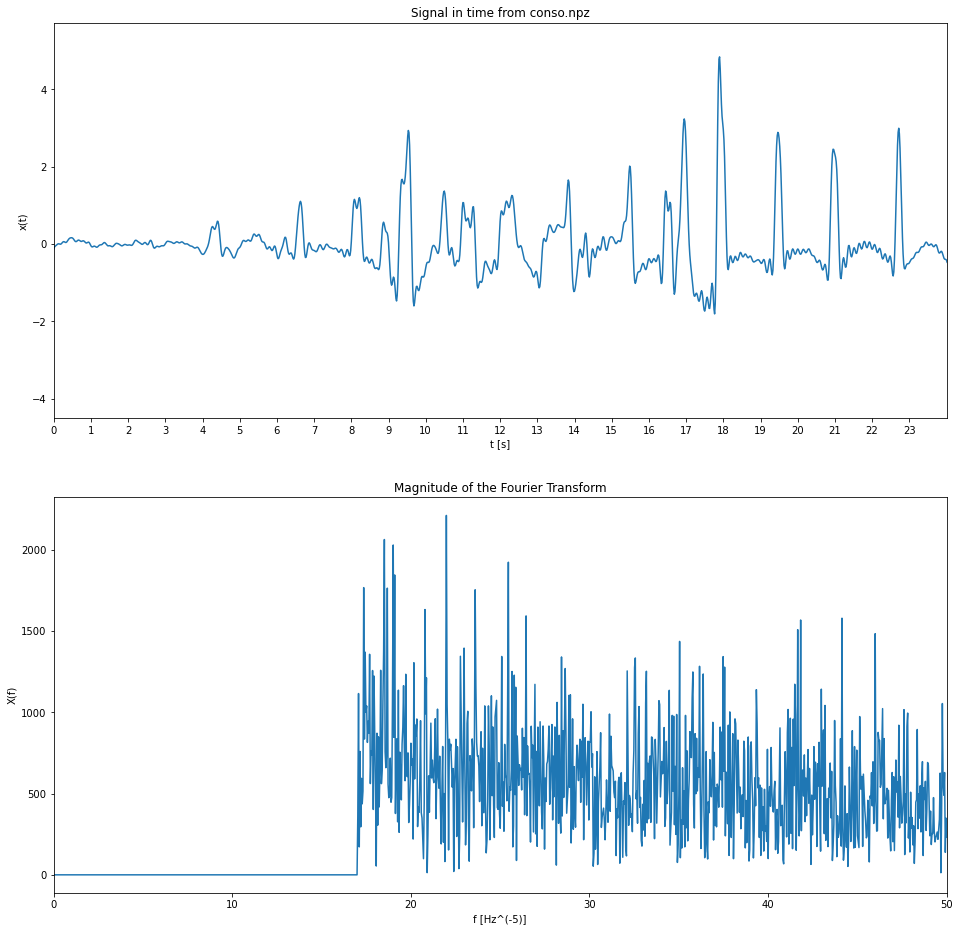

In [52]:
for i in range(len(f)) :
    #if (np.abs(f[i]) > 150)  and (np.abs(f[i]) < 700) or (np.abs(f[i]) < 50):
    #if (np.abs(f[i])*100000 < 17) :
    if (np.abs(f[i])*100000 < 17)  or (np.abs(f[i])*100000 > 200) :
        y[i] = 0
 
x = np.real(np.fft.ifft(np.fft.ifftshift(y)))

plt.figure(figsize=[16, 16])
plt.subplot(2,1,1)
pl.title('Signal in time from conso.npz')
plt.plot(t/3600, x)
plt.xlabel('t [s]')
plt.ylabel('x(t)')
pl.xlim([0,24])
pl.xticks(np.arange(0,24))
plt.subplot(2,1,2)
pl.title('Magnitude of the Fourier Transform')
plt.plot(f*100000, np.abs(y))
plt.xlabel('f [Hz^(-5)]')
plt.ylabel('X(f)')
pl.xlim([0,50])
plt.show()

Again, using an ideal bandpass we flattened the overall increase in power consumption during the day to focus on the impulse. Cutting off lower frequencies flattened the average curve while cutting off higher frequencies reduced the noise. We can now see with more details that the impulses are higher in the late afternoon and in the night.

## About The Session

I really apreciated to be able to put into practice the tools taught in the course, especially working on musical signals and sounds allowed to be able to hear the changes obtained by applying a filter. The hardest part to me was often the interpretation of the signals and the phenomenons enountered in the session, as it sometimes took time to manipulate the graph and was unintuitive to consider the signal in frequency, which I wasn't used to. But working on this allowed me to put images and sounds over the formulas and theoretical concepts presented in the course. The use of various signals allowed to put in perspective different properties for each of them.

The aspect of signal processing that appeal the most to me is the application to music and especially computer music : I have always been astonished by the attention that composers could bring to manipulate a sound without consideration of the melody and by the range of tools they could afford to equalize, pitch, pan,... The application of signal proceesing in this domain really draws my attention.

In [126]:
x=np.loadtxt('bbb.csv',delimiter=',')

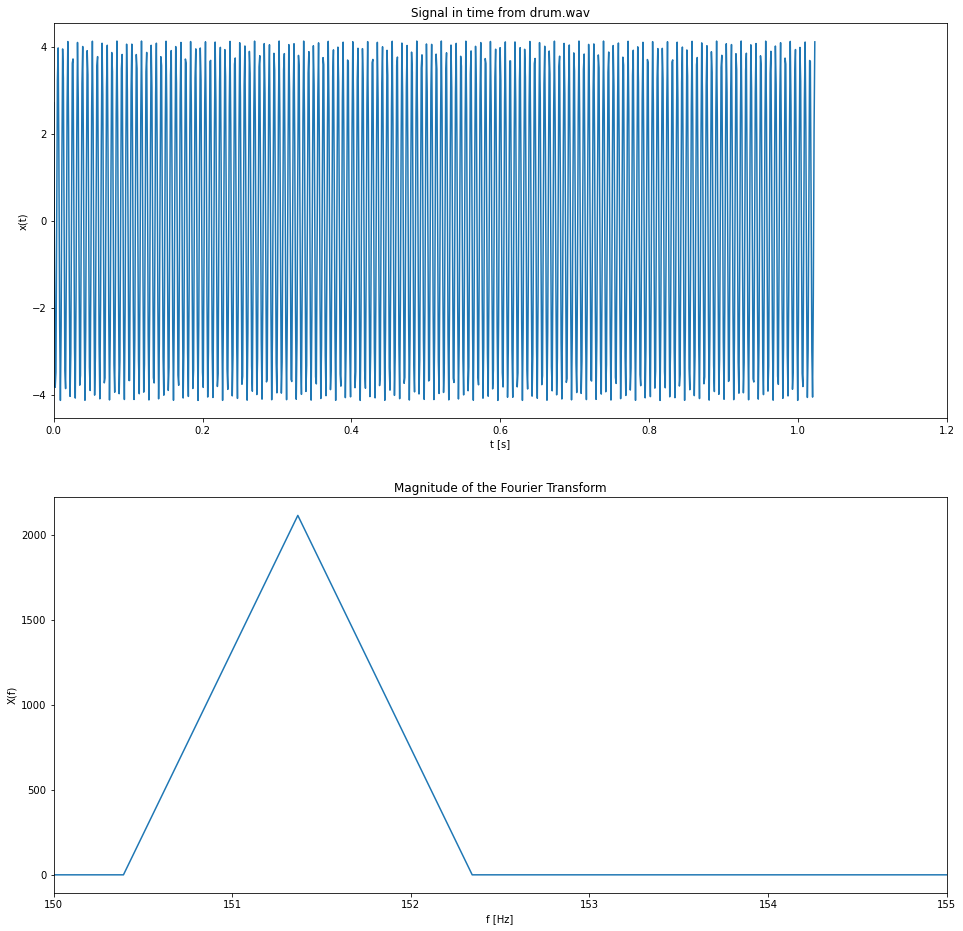

In [152]:
fs = 1000

N = len(x)
T = N/fs

t = np.arange(0,T,1/fs)

y = np.fft.fftshift(np.fft.fft(x))
f = np.fft.fftshift(np.fft.fftfreq(N))*fs

for i in range(N) :
    if np.abs(f[i]) < 151 or np.abs(f[i]) > 152 :
        y[i] = 0
        
xbis = np.real(np.fft.ifft(np.fft.fftshift(y)))


plt.figure(figsize=[16, 16])

plt.subplot(2,1,1)
pl.title('Signal in time from drum.wav')
plt.plot(t, xbis)
plt.xlabel('t [s]')
plt.ylabel('x(t)')
plt.xlim([0,1.2])

plt.subplot(2,1,2)
pl.title('Magnitude of the Fourier Transform')
plt.plot(f, np.abs(y))
plt.xlabel('f [Hz]')
plt.ylabel('X(f)')
plt.xlim([150,155])


plt.show()

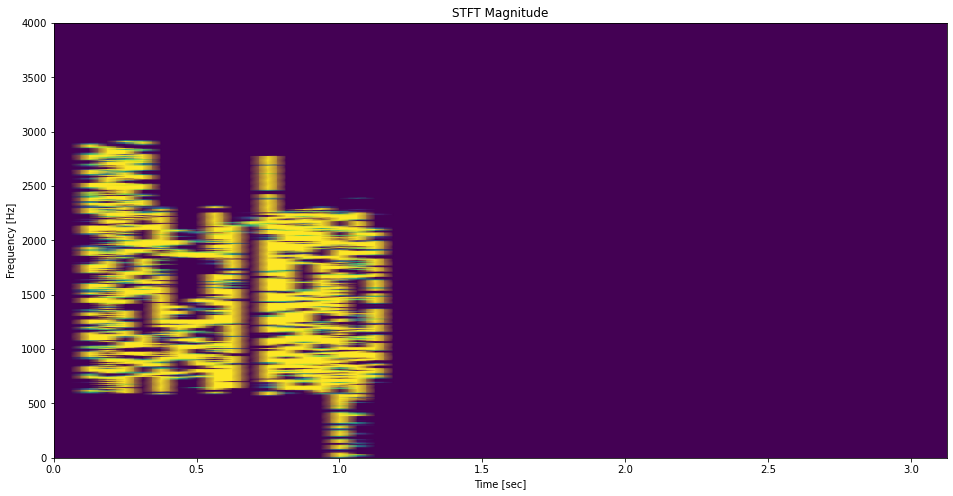

In [125]:
f, t, Zxx = signal.stft(x, fs, nperseg=1000)

amp = 2 * np.sqrt(2)
l = 20

M = np.abs(Zxx)

for i in range(len(f)) :
    for j in range(len(t)) :
        if M[i,j] >= l :
            M[j,i] = l
        else :
            M[i,j] = 0


amp = np.max(M/15)
            
plt.figure(figsize=[16, 8])

plt.pcolormesh(t, f, M, vmin=0, vmax=amp, shading='gouraud')

plt.title('STFT Magnitude')

plt.ylabel('Frequency [Hz]')

plt.xlabel('Time [sec]')

#plt.xlim([0,1.2])
#plt.ylim([0,3500])

plt.show()

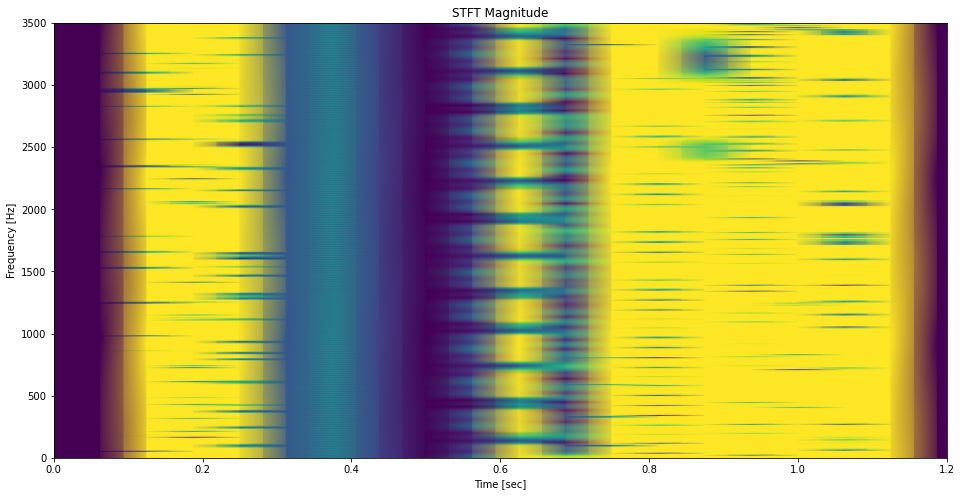

In [109]:
l = 10

for j in range(len(x)) :
    if x[j] >= l :
        x[j] -= l
    elif x[j] <= -l :
        x[j] -= l
    else :
        x[j] = 0

f, t, Zxx = signal.stft(x, fs, nperseg=1000)



M = np.abs(Zxx)




amp = np.max(M/15)
            
plt.figure(figsize=[16, 8])

plt.pcolormesh(t, f, M, vmin=0, vmax=amp, shading='gouraud')

plt.title('STFT Magnitude')

plt.ylabel('Frequency [Hz]')

plt.xlabel('Time [sec]')

plt.xlim([0,1.2])
plt.ylim([0,3500])

plt.show()